In [3]:
import sys
sys.path.append("/home/phylab/hepwork/ma5-histo")
sys.path.append("/home/phylab/hepwork/ma5_expert")

import src.SafReader as sr
from CutFlowReader import Collection 

import pandas as pd
import numpy as np
import matplotlib, os
import matplotlib.pyplot as plt
# Matplotlib configuration
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.style.use('classic')
plt.rcParams['xtick.direction']     = 'in'
plt.rcParams['ytick.direction']     = 'in'
plt.rcParams['xtick.top']           = True
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.right']         = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import matplotlib.cm as cm

from matplotlib import pyplot
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rc('text', usetex = True)
matplotlib.rc('font', **{'family' : "sans-serif"})
params= {'text.latex.preamble' : [r'\usepackage{amssymb}']}
pyplot.rcParams.update(params)

In [4]:
def df(fileLoc):
    data = sr.read(fileLoc=fileLoc)
    floatCols=['binMin', 'binMax', 'value']
    data[floatCols]  = data[floatCols].apply(pd.to_numeric, errors='coerce')
    data["bin"]      = (data.binMin+data.binMax)/2
    data             = data[data.binMax != np.inf]
    data             = data[data.binMin != -1*np.inf]
    data["binlabel"] = (data.binMin+data.binMax)/2
    return data

In [10]:
ma5 = '/home/phylab/hepwork/madanalysis5'

SM_LO  = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/SMlepneut_LO/MadAnalysis5job_0/Cutflows',
                    xsection       = (1.044819e+03*15000000 + 5.780900e+00*1000000 + 5.781400e+00*1000000 + 5.780500e+00*1000000 + + 5.118800e-01*1000000)/(19000000),
                    lumi           = 139.)
SM_LO_sumw   = SM_LO['SR_Lepton'][0].sumw
SM_LO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/SMlepneut_LO/MadAnalysis5job_0/Histograms/histos.saf')

SSM_LO  = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/SeqSMlepneut_LO/MadAnalysis5job_0/Cutflows',
                    xsection       = (1.002881e+03*15000000 + 5.644736e+00*3000000 + 4.725481e-01*1000000)/(19000000) ,
                    lumi           = 139.)
SSM_LO_sumw   = SSM_LO['SR_Lepton'][0].sumw
SSM_LO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/SeqSMlepneut_LO/MadAnalysis5job_0/Histograms/histos.saf')

SM_NLO  = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/SMlepneut_NLO/MadAnalysis5job_0/Cutflows',
                    xsection       = 6.031830e+00,
                    lumi           = 139.)
SM_NLO_sumw   = SM_LO['SR_Lepton'][0].sumw
SM_NLO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/SMlepneut_NLO/MadAnalysis5job_0/Histograms/histos.saf')


LRSM_LO  = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/LRSM_lepneut_LO/MadAnalysis5job_0/Cutflows',
                    xsection       = 6.170878e-03,
                    lumi           = 139.)
LRSM_LO_sumw   = LRSM_LO['SR_Lepton'][0].sumw
LRSM_LO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/LRSM_lepneut_LO/MadAnalysis5job_0/Histograms/histos.saf')


LRSM_NRdecay_LO  = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/LRSM_lepneut_NRdecay/MadAnalysis5job_0/Cutflows',
                    xsection       = 2.184810e-07,
                    lumi           = 139.)
LRSM_NRdecay_LO_sumw   = LRSM_NRdecay_LO['SR_Lepton'][0].sumw
LRSM_NRdecay_LO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/LRSM_lepneut_NRdecay/MadAnalysis5job_0/Histograms/histos.saf')


AddSU2L_LO  = Collection(collection_path= ma5+'/ChargeAsymmetry/Output/SAF/AddSU2L_lepneut_LO/MadAnalysis5job_0/Cutflows',
                    xsection       = 1.567073e+04,
                    lumi           = 139.)
AddSU2L_LO_sumw   = LRSM_LO['SR_Lepton'][0].sumw
AddSU2L_LO_histos = df(ma5+'/ChargeAsymmetry/Output/SAF/AddSU2L_lepneut_LO/MadAnalysis5job_0/Histograms/histos.saf')

In [6]:
#from CutFlowTable import CutFlowTable
#out =open('Comparison_LOvsNLO.tex','w')
#CutFlowTable(sm,StockSM, sample_names=['SM @LO','SM @LO using NLO pac']).write_comparison_table(out, mcunc=False)
#!make > mk.log && rm Makefile

In [7]:
lumi=139.

In [8]:
bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax)]

In [9]:
SM_Electron_MtMiss = plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Electron'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Electron'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Muon_MtMiss = plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Lepton_MtMiss = plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

NameError: name 'SM_LO_ElectronPT25_sumw' is not defined

In [39]:
SSM_Electron_MtMiss = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Electron'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Electron'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Muon_MtMiss = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Muon'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Lepton_MtMiss = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Lepton'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Lepton'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

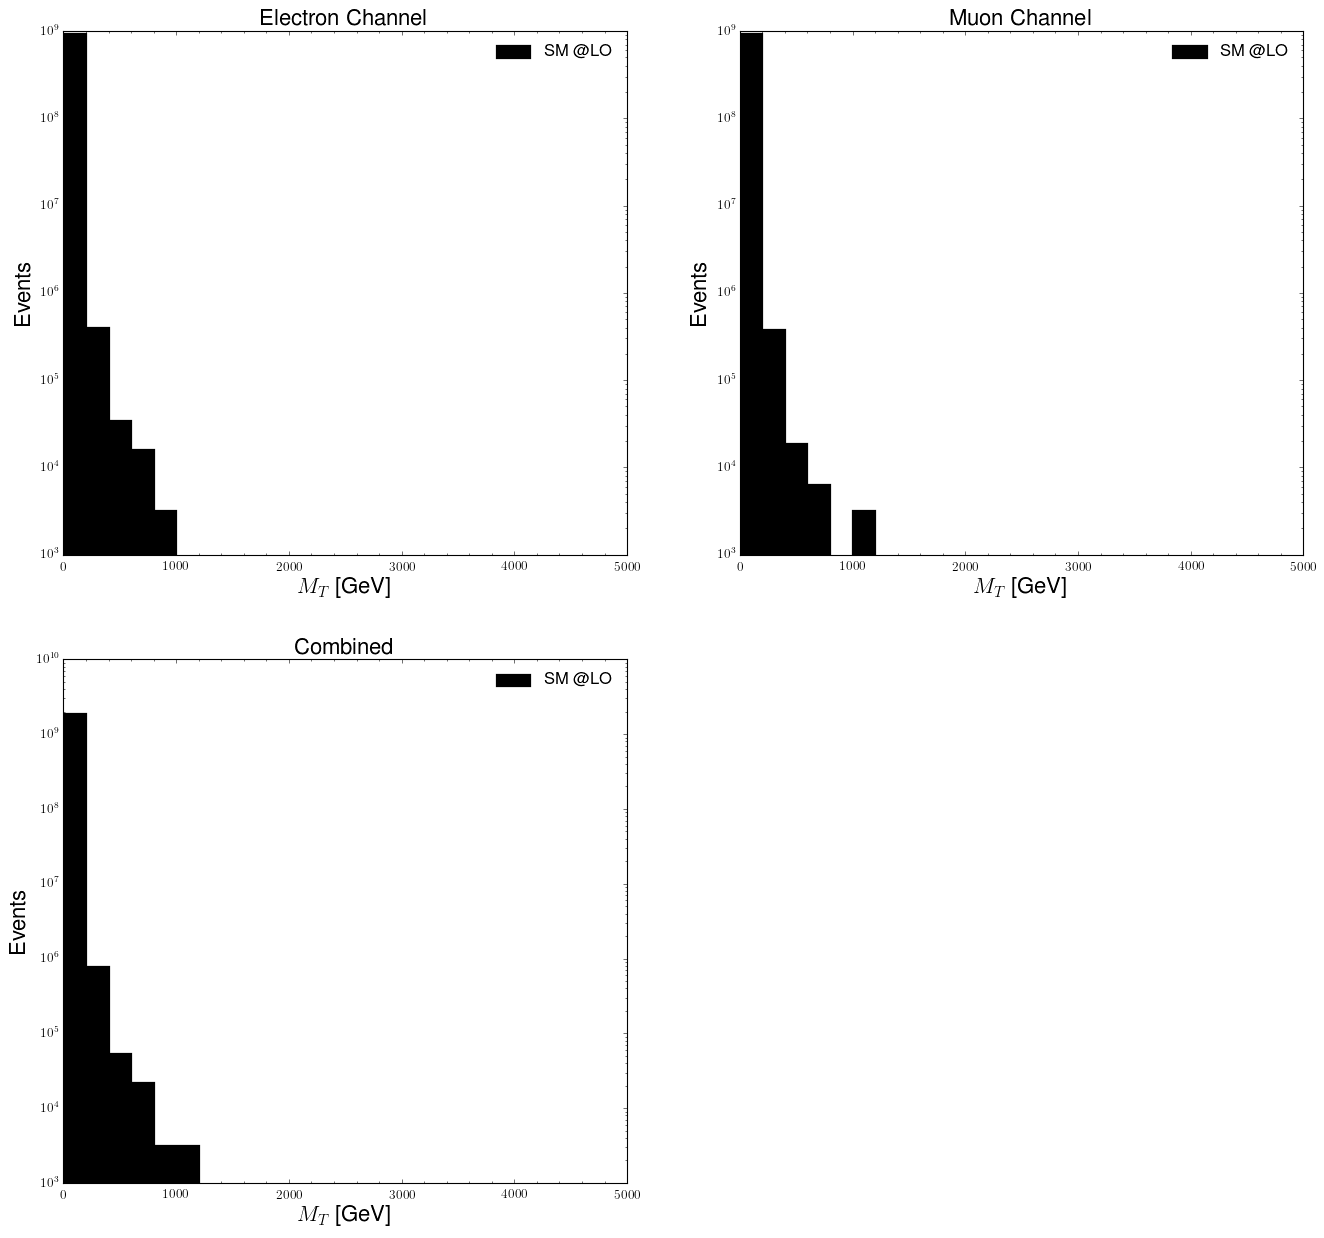

In [40]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)


ax1 = plt.subplot(2, 2, 1)
plt.title(r"Electron Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Electron'].binlabel,bins=bins,
             label=r'SM @LO', histtype="stepfilled", rwidth=1.0,
             weights=SM_Electron_MtMiss[0], facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Electron'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="stepfilled", rwidth=1.0,
#             weights=SSM_Electron_MtMiss[0], facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=1)
plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(2, 2, 2)
plt.title(r"Muon Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
             label=r'SM @LO', histtype="stepfilled", rwidth=1.0,
             weights=SM_Muon_MtMiss[0], facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="stepfilled", rwidth=1.0,
#             weights=SSM_Muon_MtMiss[0], facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


ax3 = plt.subplot(2, 2, 3)
plt.title(r"Combined", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binlabel,bins=bins,
             label=r'SM @LO', histtype="stepfilled", rwidth=1.0,
             weights=SM_Lepton_MtMiss[0], facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Lepton'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="stepfilled", rwidth=1.0,
#             weights=SSM_Lepton_MtMiss[0], facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])
#ax2.set_ylim([1e-4,1e0])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])


plt.show()

In [10]:
bins = np.array(SM_LO_histos[SM_LO_histos.name=='MET One Lepton'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MET One Lepton'].binMax)]

In [11]:
SM_Electron_MET = plt.hist(SM_LO_histos[SM_LO_histos.name=='MET One Electron'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='MET One Electron'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Muon_MET = plt.hist(SM_LO_histos[SM_LO_histos.name=='MET One Muon'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='MET One Muon'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Lepton_MET = plt.hist(SM_LO_histos[SM_LO_histos.name=='MET One Lepton'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='MET One Lepton'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

In [12]:
SSM_Electron_MET = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MET One Electron'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='MET One Electron'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Muon_MET = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MET One Muon'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='MET One Muon'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Lepton_MET = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MET One Lepton'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='MET One Lepton'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

plt.close()

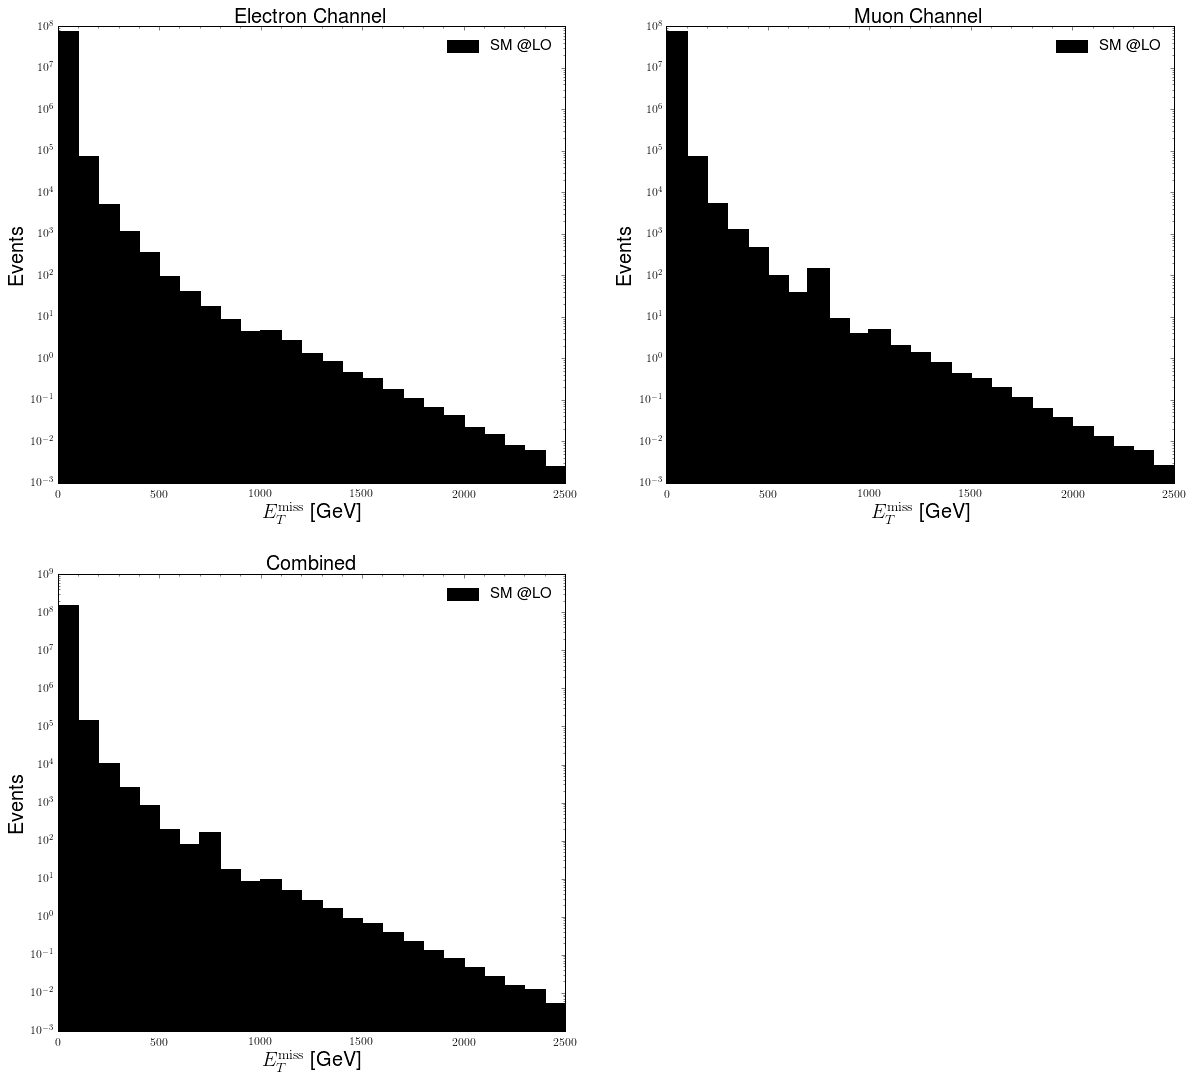

In [13]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

ax1 = plt.subplot(2, 2, 1)
plt.title(r"Electron Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MET One Electron'].binlabel,bins=bins,
             label=r'SM @LO', histtype="stepfilled", rwidth=1.0,
             weights=SM_Electron_MET[0], facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MET One Electron'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="stepfilled", rwidth=1.0,
#             weights=SSM_Electron_MET[0], facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=1)
plt.xlabel(r'$E_{T}^{\rm miss}$ [GeV]', fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(2, 2, 2)
plt.title(r"Muon Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MET One Muon'].binlabel,bins=bins,
             label=r'SM @LO', histtype="stepfilled", rwidth=1.0,
             weights=SM_Muon_MET[0], facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MET One Muon'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="stepfilled", rwidth=1.0,
#             weights=SSM_Muon_MET[0], facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel(r'$E_{T}^{\rm miss}$ [GeV]', fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


ax3 = plt.subplot(2, 2, 3)
plt.title(r"Combined", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MET One Lepton'].binlabel,bins=bins,
             label=r'SM @LO', histtype="stepfilled", rwidth=1.0,
             weights=SM_Lepton_MET[0], facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MET One Lepton'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="stepfilled", rwidth=1.0,
#             weights=SSM_Lepton_MET[0], facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel(r'$E_{T}^{\rm miss}$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])
#ax2.set_ylim([1e-4,1e0])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])


plt.show()

In [121]:
bins = np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binMax)]                                                                                                                      

In [122]:
################ SM @ LO

# Eta(l+)
SM_Electron_EtaPos = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Muon_EtaPos = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Lep_EtaPos = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

# Eta(l-)
SM_Electron_EtaNeg = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Muon_EtaNeg = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SM_Lep_EtaNeg = plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].value,dtype=float)*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

# Calculating AC Terms
ACNum_Elec_SM_LO = SM_Electron_EtaPos[0] - SM_Electron_EtaNeg[0]
ACDen_Elec_SM_LO = SM_Electron_EtaPos[0] + SM_Electron_EtaNeg[0]

ACNum_Muon_SM_LO = SM_Muon_EtaPos[0] - SM_Muon_EtaNeg[0]
ACDen_Muon_SM_LO = SM_Muon_EtaPos[0] + SM_Muon_EtaNeg[0]

ACNum_Lep_SM_LO = SM_Lep_EtaPos[0] - SM_Lep_EtaNeg[0]
ACDen_Lep_SM_LO = SM_Lep_EtaPos[0] + SM_Lep_EtaNeg[0]

# Calculate AC
AC_Elec_SM_LO = ACNum_Elec_SM_LO/np.where(ACDen_Elec_SM_LO==0,1e-10,ACDen_Elec_SM_LO)  
AC_Muon_SM_LO = ACNum_Muon_SM_LO/np.where(ACDen_Muon_SM_LO==0,1e-10,ACDen_Muon_SM_LO)
AC_Lepton_SM_LO = ACNum_Lep_SM_LO/np.where(ACDen_Lep_SM_LO==0,1e-10,ACDen_Lep_SM_LO)

plt.close()

In [123]:
################ SSM @ LO

# Eta(l+)
SSM_Electron_EtaPos = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_plus)'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Muon_EtaPos = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_plus)'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Lep_EtaPos = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_plus)'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

# Eta(l-)
SSM_Electron_EtaNeg = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_ElectronPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Muon_EtaNeg = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_MuonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

SSM_Lep_EtaNeg = plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
                   histtype="bar", rwidth=1.0,alpha=0.,
                   weights=lumi*np.array(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].value,dtype=float)*SSM_LO.xsec*1000/SSM_LO_LeptonPT25_sumw,
                   color='tab:gray', edgecolor='tab:gray', linewidth=0, linestyle="solid",
                   bottom=None, cumulative=False, density=False, align="mid", orientation="vertical")

# Calculating AC Terms
ACNum_Elec_SSM_LO = SSM_Electron_EtaPos[0] - SSM_Electron_EtaNeg[0]
ACDen_Elec_SSM_LO = SSM_Electron_EtaPos[0] + SSM_Electron_EtaNeg[0]

ACNum_Muon_SSM_LO = SSM_Muon_EtaPos[0] - SSM_Muon_EtaNeg[0]
ACDen_Muon_SSM_LO = SSM_Muon_EtaPos[0] + SSM_Muon_EtaNeg[0]

ACNum_Lep_SSM_LO = SSM_Lep_EtaPos[0] - SSM_Lep_EtaNeg[0]
ACDen_Lep_SSM_LO = SSM_Lep_EtaPos[0] + SSM_Lep_EtaNeg[0]

# Calculate AC
AC_Elec_SSM_LO = ACNum_Elec_SSM_LO/np.where(ACDen_Elec_SSM_LO==0,1e-10,ACDen_Elec_SSM_LO)
AC_Muon_SSM_LO = ACNum_Muon_SSM_LO/np.where(ACDen_Muon_SSM_LO==0,1e-10,ACDen_Muon_SSM_LO)
AC_Lepton_SSM_LO = ACNum_Lep_SSM_LO/np.where(ACDen_Lep_SSM_LO==0,1e-10,ACDen_Lep_SSM_LO)

plt.close()

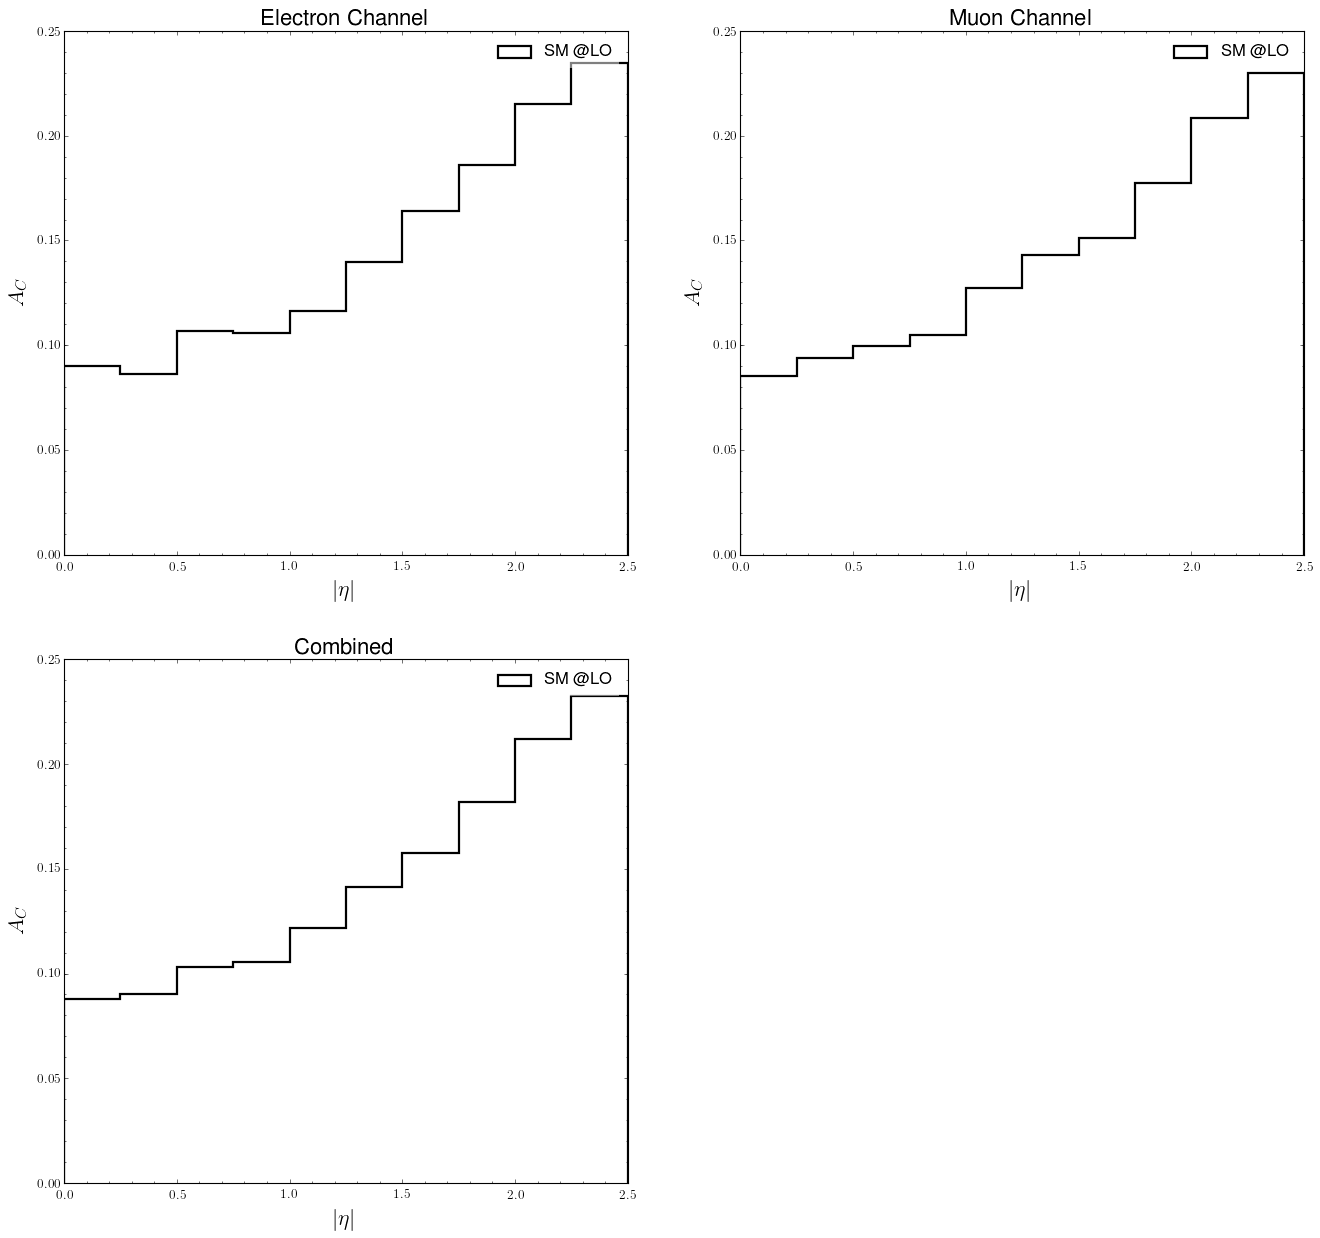

In [124]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

ax1 = plt.subplot(2, 2, 1)
plt.title(r"Electron Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Elec_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Electron_minus)'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Elec_SSM_LO, facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=1)
plt.xlabel(r'$|\eta|$', fontsize=20)
plt.ylabel(r'$A_C$', fontsize=20)
#plt.yscale('log')

ax2 = plt.subplot(2, 2, 2)
plt.title(r"Muon Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Muon_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical", zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Muon_minus)'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Muon_SSM_LO, facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel(r'$|\eta|$', fontsize=20)
plt.ylabel(r'$A_C$', fontsize=20)
#plt.yscale('log')


ax3 = plt.subplot(2, 2, 3)
plt.title(r"Combined", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lepton_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='pT > 25 GeV for AbsEta(Lepton_minus)'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Lepton_SSM_LO, facecolor="green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel(r'$|\eta|$', fontsize=20)
plt.ylabel(r'$A_C$', fontsize=20)
#plt.yscale('log')


leg = ax1.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])

leg = ax2.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])
#ax2.set_ylim([1e-4,1e0])

leg = ax3.legend(loc='upper right',fontsize=15)#,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])


plt.show()

In [14]:
############################ SM @ LO #####################################

import pandas as pd
ACC_SM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/ACC_SM_LO_13TeV.csv')

# Applt Eta < 2.5
FirstCut = ACC_SM_LO[:][(abs(ACC_SM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax)]
#print(bins)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_LepPos = []
NumofEvents_LepNeg = []
i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    NumofEvents_LepPos.append(lumi*TotEvWeight_LepPos*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    NumofEvents_LepNeg.append(lumi*TotEvWeight_LepNeg*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)    

NumofEvents_LepPos = np.array(NumofEvents_LepPos)
NumofEvents_LepNeg = np.array(NumofEvents_LepNeg)

#print(NumofEvents_LepPos)
#print(NumofEvents_LepNeg)

AC_num_Lep = NumofEvents_LepPos - NumofEvents_LepNeg
AC_den_Lep = NumofEvents_LepPos + NumofEvents_LepNeg

AC_Lep_SM_LO = AC_num_Lep/AC_den_Lep

###################### Electron Channel ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_ElecPos = []
NumofEvents_ElecNeg = []
i=0
for i in range(len(bins)-1):
    Box_ElecPos = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == -11)]
    TotEvWeight_ElecPos= sum(Box_ElecPos["EvWeight"])
    NumofEvents_ElecPos.append(lumi*TotEvWeight_ElecPos*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw)   

    Box_ElecNeg = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == 11)]
    TotEvWeight_ElecNeg = sum(Box_ElecNeg["EvWeight"])
    NumofEvents_ElecNeg.append(lumi*TotEvWeight_ElecNeg*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw)    

NumofEvents_ElecPos = np.array(NumofEvents_ElecPos)
NumofEvents_ElecNeg = np.array(NumofEvents_ElecNeg)

#print(NumofEvents_LepPos)
#print(NumofEvents_LepNeg)

AC_num_Elec = NumofEvents_ElecPos - NumofEvents_ElecNeg
AC_den_Elec = NumofEvents_ElecPos + NumofEvents_ElecNeg

AC_Elec_SM_LO = AC_num_Elec/AC_den_Elec

###################### Muon Channel ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_MuonPos = []
NumofEvents_MuonNeg = []
i=0
for i in range(len(bins)-1):
    Box_MuonPos = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == -13)]
    TotEvWeight_MuonPos= sum(Box_MuonPos["EvWeight"])
    NumofEvents_MuonPos.append(lumi*TotEvWeight_MuonPos*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw)   

    Box_MuonNeg = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == 13)]
    TotEvWeight_MuonNeg = sum(Box_MuonNeg["EvWeight"])
    NumofEvents_MuonNeg.append(lumi*TotEvWeight_MuonNeg*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw)    

NumofEvents_MuonPos = np.array(NumofEvents_MuonPos)
NumofEvents_MuonNeg = np.array(NumofEvents_MuonNeg)

#print(NumofEvents_MuonPos)
#print(NumofEvents_MuonNeg)

AC_num_Muon = NumofEvents_MuonPos - NumofEvents_MuonNeg
AC_den_Muon = NumofEvents_MuonPos + NumofEvents_MuonNeg

AC_Muon_SM_LO = AC_num_Muon/AC_den_Muon

In [94]:
############################ SSM @ LO #####################################

import pandas as pd
ACC_SSM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/ACC_SSM_LO_13TeV.csv')
#print(ACC_SSM_LO)

# Applt Eta < 2.5
FirstCut = ACC_SSM_LO[:][(abs(ACC_SSM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]
#print(SecondCut)

bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax)]
#print(bins)


###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_LepPos = []
NumofEvents_LepNeg = []
i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    NumofEvents_LepPos.append(lumi*TotEvWeight_LepPos*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    NumofEvents_LepNeg.append(lumi*TotEvWeight_LepNeg*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)    

NumofEvents_LepPos = np.array(NumofEvents_LepPos)
NumofEvents_LepNeg = np.array(NumofEvents_LepNeg)

#print(NumofEvents_LepPos)
#print(NumofEvents_LepNeg)

AC_num_Lep = NumofEvents_LepPos - NumofEvents_LepNeg
AC_den_Lep = NumofEvents_LepPos + NumofEvents_LepNeg

AC_Lep_SSM_LO = AC_num_Lep/np.where(AC_den_Lep==0,1e-10,AC_den_Lep)

###################### Electron Channel ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_ElecPos = []
NumofEvents_ElecNeg = []
i=0
for i in range(len(bins)-1):
    Box_ElecPos = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == -11)]
    TotEvWeight_ElecPos= sum(Box_ElecPos["EvWeight"])
    NumofEvents_ElecPos.append(lumi*TotEvWeight_ElecPos*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw)   

    Box_ElecNeg = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == 11)]
    TotEvWeight_ElecNeg = sum(Box_ElecNeg["EvWeight"])
    NumofEvents_ElecNeg.append(lumi*TotEvWeight_ElecNeg*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw)    

NumofEvents_ElecPos = np.array(NumofEvents_ElecPos)
NumofEvents_ElecNeg = np.array(NumofEvents_ElecNeg)

#print(NumofEvents_LepPos)
#print(NumofEvents_LepNeg)

AC_num_Elec = NumofEvents_ElecPos - NumofEvents_ElecNeg
AC_den_Elec = NumofEvents_ElecPos + NumofEvents_ElecNeg

AC_Elec_SSM_LO = AC_num_Elec/np.where(AC_den_Elec==0,1e-10,AC_den_Elec)

###################### Muon Channel ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_MuonPos = []
NumofEvents_MuonNeg = []
i=0
for i in range(len(bins)-1):
    Box_MuonPos = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == -13)]
    TotEvWeight_MuonPos= sum(Box_MuonPos["EvWeight"])
    NumofEvents_MuonPos.append(lumi*TotEvWeight_MuonPos*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw)   

    Box_MuonNeg = SecondCut[:][(SecondCut["MtMiss"]>=bins[i]) & (SecondCut["MtMiss"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == 13)]
    TotEvWeight_MuonNeg = sum(Box_MuonNeg["EvWeight"])
    NumofEvents_MuonNeg.append(lumi*TotEvWeight_MuonNeg*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw)    

NumofEvents_MuonPos = np.array(NumofEvents_MuonPos)
NumofEvents_MuonNeg = np.array(NumofEvents_MuonNeg)

#print(NumofEvents_MuonPos)
#print(NumofEvents_MuonNeg)

AC_num_Muon = NumofEvents_MuonPos - NumofEvents_MuonNeg
AC_den_Muon = NumofEvents_MuonPos + NumofEvents_MuonNeg

AC_Muon_SSM_LO = AC_num_Muon/np.where(AC_den_Muon==0,1e-10,AC_den_Muon)

IOError: File /home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/ACC_SSM_LO_8TeV.csv does not exist

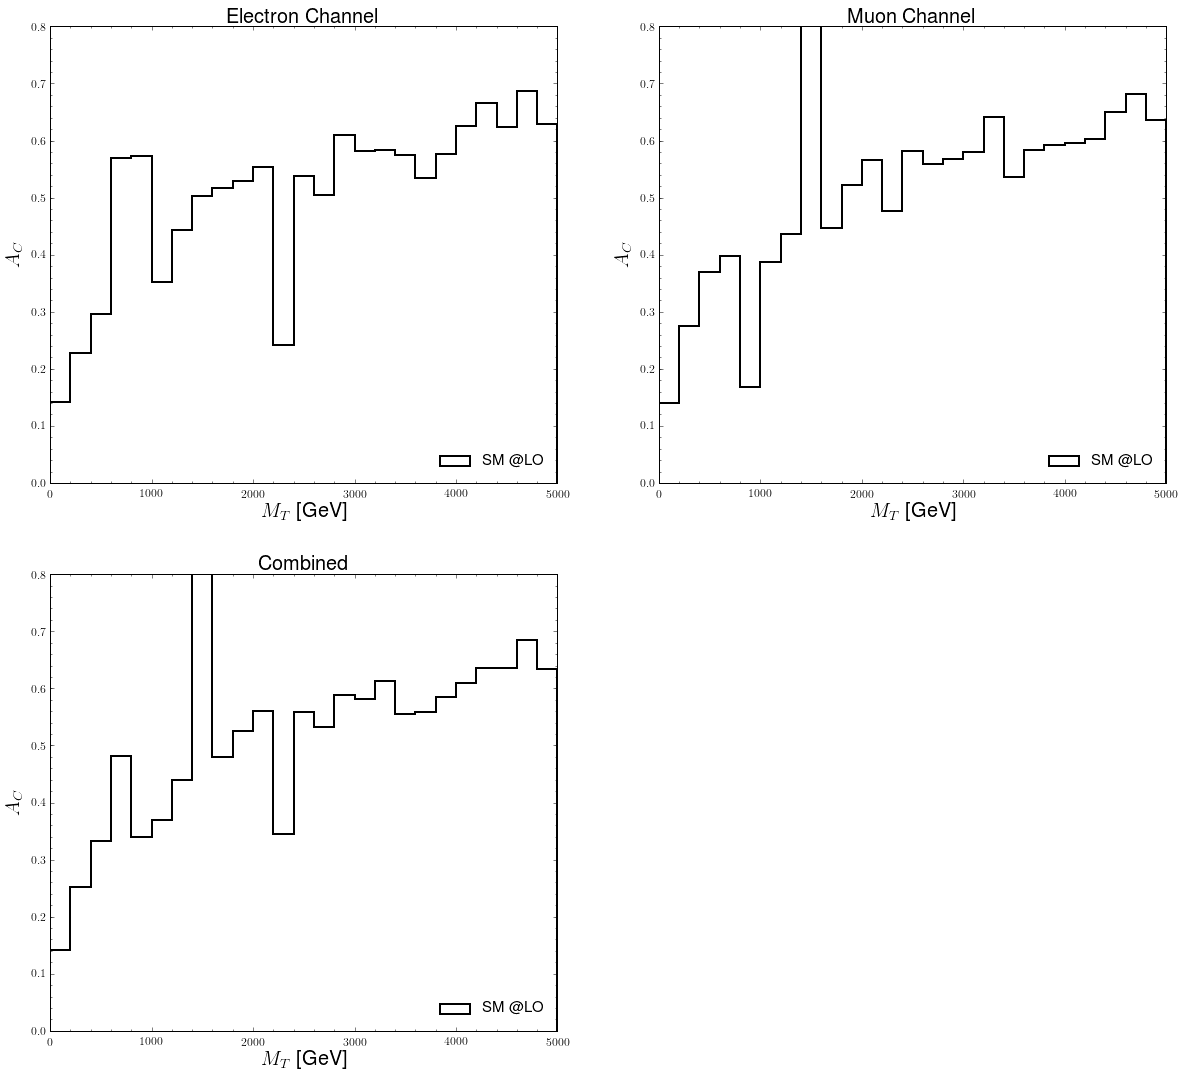

In [15]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

ax1 = plt.subplot(2, 2, 3)
plt.title(r"Combined", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Lepton'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Lep_SSM_LO, facecolor="green",
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

ax2 = plt.subplot(2, 2, 1)
plt.title(r"Electron Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Electron'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Elec_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Electron'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Elec_SSM_LO, facecolor="green",
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)

plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

ax3 = plt.subplot(2, 2, 2)
plt.title(r"Muon Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Muon_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Muon_SSM_LO, facecolor="green",
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

leg = ax1.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
ax1.set_ylim([0.,0.8])

leg = ax2.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])
ax2.set_ylim([0.,0.8])

leg = ax3.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])
ax3.set_ylim([0.,0.8])

plt.show()

In [16]:
########################### Ac vs Eta Plot ##############################

############################ SM @ LO #####################################

import pandas as pd
#ACC_SM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/ACC_SM_LO_13TeV.csv')
#print(ACC_SM_LO)

# Applt Eta < 2.5
FirstCut = ACC_SM_LO[:][(abs(ACC_SM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

bins = np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_minus)'].binMax)]
#print(bins)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_LepPos = []
NumofEvents_LepNeg = []
i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["Eta"]>=bins[i]) & (SecondCut["Eta"]<=bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    NumofEvents_LepPos.append(lumi*TotEvWeight_LepPos*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg = SecondCut[:][(SecondCut["Eta"]>=bins[i]) & (SecondCut["Eta"]<=bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    NumofEvents_LepNeg.append(lumi*TotEvWeight_LepNeg*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)    

NumofEvents_LepPos = np.array(NumofEvents_LepPos)
NumofEvents_LepNeg = np.array(NumofEvents_LepNeg)

#print(NumofEvents_LepPos)
#print(NumofEvents_LepNeg)

AC_num_Lep = NumofEvents_LepPos - NumofEvents_LepNeg
AC_den_Lep = NumofEvents_LepPos + NumofEvents_LepNeg

AC_Lep_SM_LO = AC_num_Lep/AC_den_Lep

###################### Electron Channel ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_ElecPos = []
NumofEvents_ElecNeg = []
i=0
for i in range(len(bins)-1):
    Box_ElecPos = SecondCut[:][(SecondCut["Eta"]>=bins[i]) & (SecondCut["Eta"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == -11)]
    TotEvWeight_ElecPos= sum(Box_ElecPos["EvWeight"])
    NumofEvents_ElecPos.append(lumi*TotEvWeight_ElecPos*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw)   

    Box_ElecNeg = SecondCut[:][(SecondCut["Eta"]>=bins[i]) & (SecondCut["Eta"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == 11)]
    TotEvWeight_ElecNeg = sum(Box_ElecNeg["EvWeight"])
    NumofEvents_ElecNeg.append(lumi*TotEvWeight_ElecNeg*SM_LO.xsec*1000/SM_LO_ElectronPT25_sumw)    

NumofEvents_ElecPos = np.array(NumofEvents_ElecPos)
NumofEvents_ElecNeg = np.array(NumofEvents_ElecNeg)

#print(NumofEvents_LepPos)
#print(NumofEvents_LepNeg)

AC_num_Elec = NumofEvents_ElecPos - NumofEvents_ElecNeg
AC_den_Elec = NumofEvents_ElecPos + NumofEvents_ElecNeg

AC_Elec_SM_LO = AC_num_Elec/AC_den_Elec

###################### Muon Channel ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_MuonPos = []
NumofEvents_MuonNeg = []
i=0
for i in range(len(bins)-1):
    Box_MuonPos = SecondCut[:][(SecondCut["Eta"]>=bins[i]) & (SecondCut["Eta"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == -13)]
    TotEvWeight_MuonPos= sum(Box_MuonPos["EvWeight"])
    NumofEvents_MuonPos.append(lumi*TotEvWeight_MuonPos*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw)   

    Box_MuonNeg = SecondCut[:][(SecondCut["Eta"]>=bins[i]) & (SecondCut["Eta"]<=bins[i+1]) & (SecondCut["Lepton_ID"] == 13)]
    TotEvWeight_MuonNeg = sum(Box_MuonNeg["EvWeight"])
    NumofEvents_MuonNeg.append(lumi*TotEvWeight_MuonNeg*SM_LO.xsec*1000/SM_LO_MuonPT25_sumw)    

NumofEvents_MuonPos = np.array(NumofEvents_MuonPos)
NumofEvents_MuonNeg = np.array(NumofEvents_MuonNeg)

#print(NumofEvents_MuonPos)
#print(NumofEvents_MuonNeg)

AC_num_Muon = NumofEvents_MuonPos - NumofEvents_MuonNeg
AC_den_Muon = NumofEvents_MuonPos + NumofEvents_MuonNeg

AC_Muon_SM_LO = AC_num_Muon/AC_den_Muon

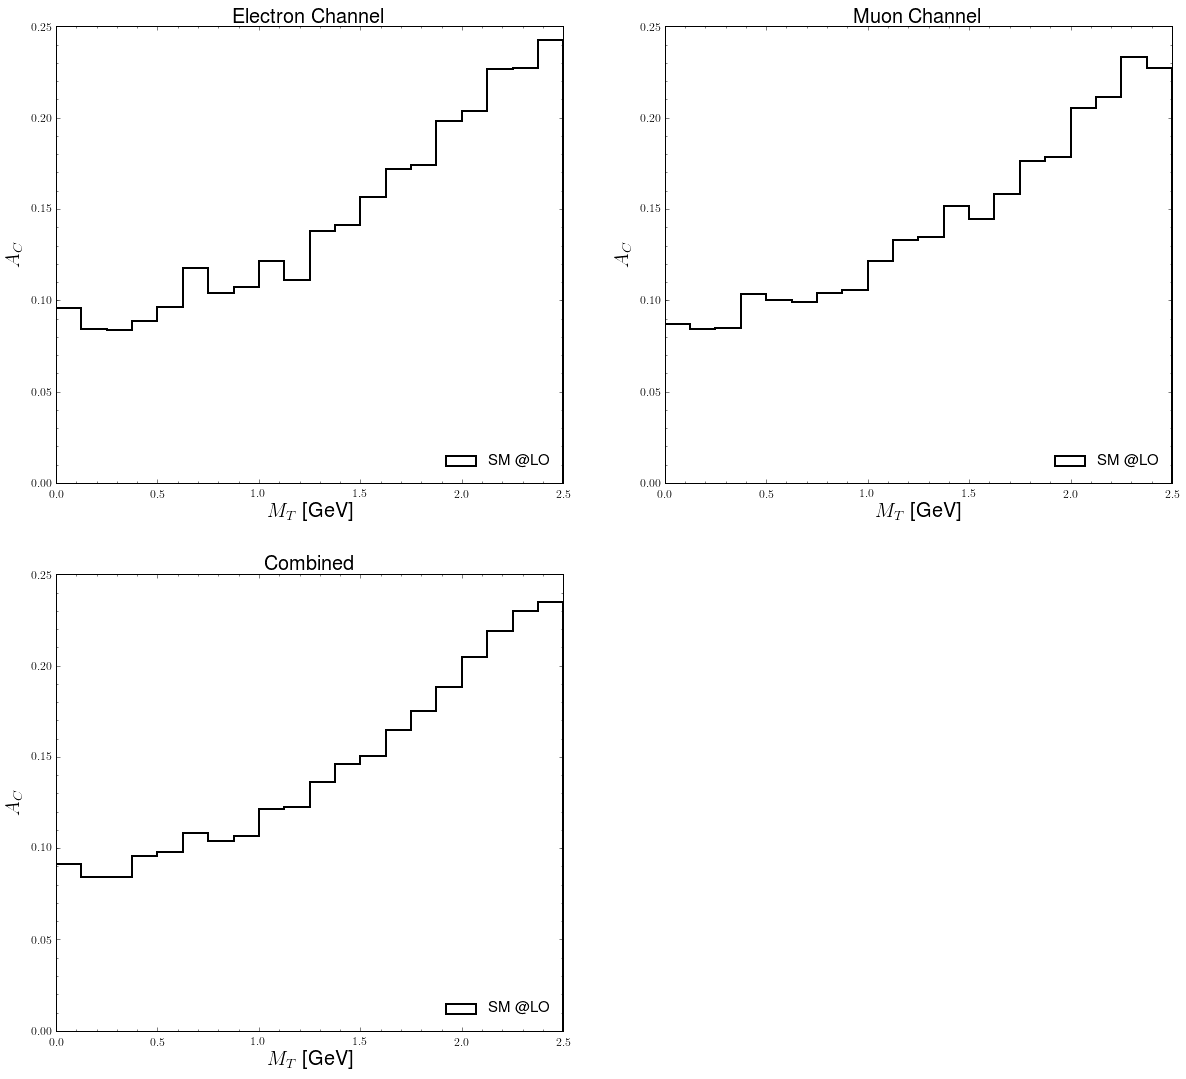

In [17]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

ax1 = plt.subplot(2, 2, 3)
plt.title(r"Combined", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Lepton'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Lep_SSM_LO, facecolor="green",
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

ax2 = plt.subplot(2, 2, 1)
plt.title(r"Electron Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Elec_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Electron'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Elec_SSM_LO, facecolor="green",
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)

plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

ax3 = plt.subplot(2, 2, 2)
plt.title(r"Muon Channel", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Muon_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(SSM_LO_histos[SSM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
#             label=r'SSM @LO', histtype="step", rwidth=1.0,
#             weights=AC_Muon_SSM_LO, facecolor="green",
#             color=None, edgecolor='green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.xlabel('$M_{T}$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

leg = ax1.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),max(bins)])
#ax1.set_ylim([0.,0.8])

leg = ax2.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([min(bins),max(bins)])
#ax2.set_ylim([0.,0.8])

leg = ax3.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax3.set_xlim([min(bins),max(bins)])
#ax3.set_ylim([0.,0.8])

plt.show()

In [226]:
########################### Ac vs Eta Plot ##############################

############################ SM @ LO #####################################

import pandas as pd
ACC_SM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/CurrentData/SMlepneut_LO.csv')
#print(ACC_SM_LO)

# Applt Eta < 2.5
FirstCut = ACC_SM_LO[:][(abs(ACC_SM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMissCut_500 = SecondCut[:][(SecondCut["MtMiss"]>=500)]
MtMissCut_1000 = SecondCut[:][(SecondCut["MtMiss"]>=1000)]
MtMissCut_2000 = SecondCut[:][(SecondCut["MtMiss"]>=2000)]

bin_pos = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5]
#bin_neg =[-2.5, -2.375, -2.25, -2.125, -2.0, -1.875, -1.75,-1.625,-1.5,-1.375,-1.25,-1.125,-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125]
bins = bin_pos
#print(bins)

#bins = np.array(SM_LO_histos[SM_LO_histos.name=='AbsEta(Lepton_plus)'].binMin).tolist()+(SM_LO_histos[SM_LO_histos.name=='AbsEta(Lepton_minus)'].binMax)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
TotEvWeight_LepPos_List = []
TotEvWeight_LepNeg_List = []

TotEvWeight_LepPos_MtMiss_500_List = []
TotEvWeight_LepNeg_MtMiss_500_List = []

TotEvWeight_LepPos_MtMiss_1000_List = []
TotEvWeight_LepNeg_MtMiss_1000_List = []

TotEvWeight_LepPos_MtMiss_2000_List = []
TotEvWeight_LepNeg_MtMiss_2000_List = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(abs(SecondCut["Eta"])>=bins[i]) & (abs(SecondCut["Eta"])<=bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List.append(TotEvWeight_LepPos) 

    Box_LepNeg = SecondCut[:][(abs(SecondCut["Eta"])>=bins[i]) & (abs(SecondCut["Eta"])<=bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List.append(TotEvWeight_LepNeg)      
     
    #MT > 500 GeV
    Box_LepPos_MtMiss_500  = MtMissCut_500[:][(abs(MtMissCut_500["Eta"])>=bins[i]) & (abs(MtMissCut_500["Eta"])<=bins[i+1]) & (MtMissCut_500["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_500 = sum(Box_LepPos_MtMiss_500["EvWeight"])
    TotEvWeight_LepPos_MtMiss_500_List.append(TotEvWeight_LepPos_MtMiss_500)  

    Box_LepNeg_MtMiss_500 = MtMissCut_500[:][(abs(MtMissCut_500["Eta"])>=bins[i]) & (abs(MtMissCut_500["Eta"])<=bins[i+1]) & (MtMissCut_500["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_500 = sum(Box_LepNeg_MtMiss_500["EvWeight"])
    TotEvWeight_LepNeg_MtMiss_500_List.append(TotEvWeight_LepNeg_MtMiss_500)     
    
    #MT > 1000 GeV
    Box_LepPos_MtMiss_1000  = MtMissCut_1000[:][(abs(MtMissCut_1000["Eta"])>=bins[i]) & (abs(MtMissCut_1000["Eta"])<=bins[i+1]) & (MtMissCut_1000["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_1000 = sum(Box_LepPos_MtMiss_1000["EvWeight"])
    TotEvWeight_LepPos_MtMiss_1000_List.append(TotEvWeight_LepPos_MtMiss_1000)  

    Box_LepNeg_MtMiss_1000 = MtMissCut_1000[:][(abs(MtMissCut_1000["Eta"])>=bins[i]) & (abs(MtMissCut_1000["Eta"])<=bins[i+1]) & (MtMissCut_1000["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_1000 = sum(Box_LepNeg_MtMiss_1000["EvWeight"])
    TotEvWeight_LepNeg_MtMiss_1000_List.append(TotEvWeight_LepNeg_MtMiss_1000)      
    
    #MT > 2000 GeV
    Box_LepPos_MtMiss_2000  = MtMissCut_2000[:][(abs(MtMissCut_2000["Eta"])>=bins[i]) & (abs(MtMissCut_2000["Eta"])<=bins[i+1]) & (MtMissCut_2000["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_2000 = sum(Box_LepPos_MtMiss_2000["EvWeight"])
    TotEvWeight_LepPos_MtMiss_2000_List.append(TotEvWeight_LepPos_MtMiss_2000)  

    Box_LepNeg_MtMiss_2000 = MtMissCut_2000[:][(abs(MtMissCut_2000["Eta"])>=bins[i]) & (abs(MtMissCut_2000["Eta"])<=bins[i+1]) & (MtMissCut_2000["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_2000 = sum(Box_LepNeg_MtMiss_2000["EvWeight"])
    TotEvWeight_LepNeg_MtMiss_2000_List.append(TotEvWeight_LepNeg_MtMiss_2000)       
    
    
TotEvWeight_LepPos_Arr =  np.array(TotEvWeight_LepPos_List)   
TotEvWeight_LepNeg_Arr =  np.array(TotEvWeight_LepNeg_List) 

TotEvWeight_LepPos_MtMiss_500_Arr =  np.array(TotEvWeight_LepPos_MtMiss_500_List)   
TotEvWeight_LepNeg_MtMiss_500_Arr =  np.array(TotEvWeight_LepNeg_MtMiss_500_List) 

TotEvWeight_LepPos_MtMiss_1000_Arr =  np.array(TotEvWeight_LepPos_MtMiss_1000_List)   
TotEvWeight_LepNeg_MtMiss_1000_Arr =  np.array(TotEvWeight_LepNeg_MtMiss_1000_List) 
  
TotEvWeight_LepPos_MtMiss_2000_Arr =  np.array(TotEvWeight_LepPos_MtMiss_2000_List)   
TotEvWeight_LepNeg_MtMiss_2000_Arr =  np.array(TotEvWeight_LepNeg_MtMiss_2000_List) 
    
    
AC_num_Lep = TotEvWeight_LepPos_Arr - TotEvWeight_LepNeg_Arr
AC_den_Lep = TotEvWeight_LepPos_Arr + TotEvWeight_LepNeg_Arr
    
AC_num_Lep_MtMiss_500 = TotEvWeight_LepPos_MtMiss_500_Arr - TotEvWeight_LepNeg_MtMiss_500_Arr
AC_den_Lep_MtMiss_500 = TotEvWeight_LepPos_MtMiss_500_Arr + TotEvWeight_LepNeg_MtMiss_500_Arr   
    
AC_num_Lep_MtMiss_1000 = TotEvWeight_LepPos_MtMiss_1000_Arr - TotEvWeight_LepNeg_MtMiss_1000_Arr
AC_den_Lep_MtMiss_1000 = TotEvWeight_LepPos_MtMiss_1000_Arr + TotEvWeight_LepNeg_MtMiss_1000_Arr       
    
AC_num_Lep_MtMiss_2000 = TotEvWeight_LepPos_MtMiss_1000_Arr - TotEvWeight_LepNeg_MtMiss_2000_Arr
AC_den_Lep_MtMiss_2000 = TotEvWeight_LepPos_MtMiss_1000_Arr + TotEvWeight_LepNeg_MtMiss_2000_Arr       
    
    
AC_Lep_SM_LO        = AC_num_Lep/np.where(AC_den_Lep==0,1e10,AC_den_Lep)
AC_Lep_SM_LO_MtMiss_500 = AC_num_Lep_MtMiss_500/np.where(AC_den_Lep_MtMiss_500==0,1e10,AC_den_Lep_MtMiss_500)
AC_Lep_SM_LO_MtMiss_1000 = AC_num_Lep_MtMiss_1000/np.where(AC_den_Lep_MtMiss_1000==0,1e10,AC_den_Lep_MtMiss_1000)    
AC_Lep_SM_LO_MtMiss_2000 = AC_num_Lep_MtMiss_2000/np.where(AC_den_Lep_MtMiss_2000==0,1e10,AC_den_Lep_MtMiss_2000)   
    
        
SM_LO_totsumw = sum(TotEvWeight_LepPos_Arr)+sum(TotEvWeight_LepNeg_Arr)
SM_LO_totsumw_MtMiss_500 = sum(TotEvWeight_LepPos_MtMiss_500_Arr)+sum(TotEvWeight_LepNeg_MtMiss_500_Arr)
SM_LO_totsumw_MtMiss_1000 = sum(TotEvWeight_LepPos_MtMiss_1000_Arr)+sum(TotEvWeight_LepNeg_MtMiss_1000_Arr)
SM_LO_totsumw_MtMiss_2000 = sum(TotEvWeight_LepPos_MtMiss_2000_Arr)+sum(TotEvWeight_LepNeg_MtMiss_2000_Arr)

#Number of Events
NumofEvents_LepPos = TotEvWeight_LepPos_Arr*lumi*SM_LO.xsec*1000/SM_LO_totsumw
NumofEvents_LepNeg = TotEvWeight_LepNeg_Arr*lumi*SM_LO.xsec*1000/SM_LO_totsumw

NumofEvents_LepPos_MtMiss_500 = TotEvWeight_LepPos_MtMiss_500_Arr*lumi*SM_LO.xsec*1000/SM_LO_totsumw_MtMiss_500
NumofEvents_LepNeg_MtMiss_500 = TotEvWeight_LepNeg_MtMiss_500_Arr*lumi*SM_LO.xsec*1000/SM_LO_totsumw_MtMiss_500   
    
NumofEvents_LepPos_MtMiss_1000 = TotEvWeight_LepPos_MtMiss_1000_Arr*lumi*SM_LO.xsec*1000/AC_Lep_SM_LO_MtMiss_1000
NumofEvents_LepNeg_MtMiss_1000 = TotEvWeight_LepNeg_MtMiss_1000_Arr*lumi*SM_LO.xsec*1000/AC_Lep_SM_LO_MtMiss_1000   

NumofEvents_LepPos_MtMiss_2000 = TotEvWeight_LepPos_MtMiss_2000_Arr*lumi*SM_LO.xsec*1000/SM_LO_totsumw_MtMiss_2000
NumofEvents_LepNeg_MtMiss_2000 = TotEvWeight_LepNeg_MtMiss_2000_Arr*lumi*SM_LO.xsec*1000/SM_LO_totsumw_MtMiss_2000

In [299]:
########################### Ac vs Eta Plot ##############################

############################ SSM @ LO #####################################

import pandas as pd
ACC_SM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/CurrentData/SeqSMlepneut_LO.csv')
#print(ACC_SM_LO)

# Applt Eta < 2.5
FirstCut = ACC_SM_LO[:][(abs(ACC_SM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMissCut_500 = SecondCut[:][(SecondCut["MtMiss"]>=500)]
MtMissCut_1000 = SecondCut[:][(SecondCut["MtMiss"]>=1000)]
MtMissCut_2000 = SecondCut[:][(SecondCut["MtMiss"]>=2000)]

bin_pos = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5]
#bin_neg =[-2.5, -2.375, -2.25, -2.125, -2.0, -1.875, -1.75,-1.625,-1.5,-1.375,-1.25,-1.125,-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125]
bins = bin_pos
#print(bins)

#bins = np.array(SM_LO_histos[SM_LO_histos.name=='AbsEta(Lepton_plus)'].binMin).tolist()+(SM_LO_histos[SM_LO_histos.name=='AbsEta(Lepton_minus)'].binMax)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
TotEvWeight_LepPos_List = []
TotEvWeight_LepNeg_List = []

TotEvWeight_LepPos_MtMiss_500_List = []
TotEvWeight_LepNeg_MtMiss_500_List = []

TotEvWeight_LepPos_MtMiss_1000_List = []
TotEvWeight_LepNeg_MtMiss_1000_List = []

TotEvWeight_LepPos_MtMiss_2000_List = []
TotEvWeight_LepNeg_MtMiss_2000_List = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(abs(SecondCut["Eta"])>=bins[i]) & (abs(SecondCut["Eta"])<=bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List.append(TotEvWeight_LepPos) 

    Box_LepNeg = SecondCut[:][(abs(SecondCut["Eta"])>=bins[i]) & (abs(SecondCut["Eta"])<=bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List.append(TotEvWeight_LepNeg)      
     
    #MT > 500 GeV
    Box_LepPos_MtMiss_500  = MtMissCut_500[:][(abs(MtMissCut_500["Eta"])>=bins[i]) & (abs(MtMissCut_500["Eta"])<=bins[i+1]) & (MtMissCut_500["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_500 = sum(Box_LepPos_MtMiss_500["EvWeight"])
    TotEvWeight_LepPos_MtMiss_500_List.append(TotEvWeight_LepPos_MtMiss_500)  

    Box_LepNeg_MtMiss_500 = MtMissCut_500[:][(abs(MtMissCut_500["Eta"])>=bins[i]) & (abs(MtMissCut_500["Eta"])<=bins[i+1]) & (MtMissCut_500["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_500 = sum(Box_LepNeg_MtMiss_500["EvWeight"])
    TotEvWeight_LepNeg_MtMiss_500_List.append(TotEvWeight_LepNeg_MtMiss_500)     
    
    #MT > 1000 GeV
    Box_LepPos_MtMiss_1000  = MtMissCut_1000[:][(abs(MtMissCut_1000["Eta"])>=bins[i]) & (abs(MtMissCut_1000["Eta"])<=bins[i+1]) & (MtMissCut_1000["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_1000 = sum(Box_LepPos_MtMiss_1000["EvWeight"])
    TotEvWeight_LepPos_MtMiss_1000_List.append(TotEvWeight_LepPos_MtMiss_1000)  

    Box_LepNeg_MtMiss_1000 = MtMissCut_1000[:][(abs(MtMissCut_1000["Eta"])>=bins[i]) & (abs(MtMissCut_1000["Eta"])<=bins[i+1]) & (MtMissCut_1000["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_1000 = sum(Box_LepNeg_MtMiss_1000["EvWeight"])
    TotEvWeight_LepNeg_MtMiss_1000_List.append(TotEvWeight_LepNeg_MtMiss_1000)      
    
    #MT > 2000 GeV
    Box_LepPos_MtMiss_2000  = MtMissCut_2000[:][(abs(MtMissCut_2000["Eta"])>=bins[i]) & (abs(MtMissCut_2000["Eta"])<=bins[i+1]) & (MtMissCut_2000["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_2000 = sum(Box_LepPos_MtMiss_2000["EvWeight"])
    TotEvWeight_LepPos_MtMiss_2000_List.append(TotEvWeight_LepPos_MtMiss_2000)  

    Box_LepNeg_MtMiss_2000 = MtMissCut_2000[:][(abs(MtMissCut_2000["Eta"])>=bins[i]) & (abs(MtMissCut_2000["Eta"])<=bins[i+1]) & (MtMissCut_2000["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_2000 = sum(Box_LepNeg_MtMiss_2000["EvWeight"])
    TotEvWeight_LepNeg_MtMiss_2000_List.append(TotEvWeight_LepNeg_MtMiss_2000)       
    
    
TotEvWeight_LepPos_Arr =  np.array(TotEvWeight_LepPos_List)   
TotEvWeight_LepNeg_Arr =  np.array(TotEvWeight_LepNeg_List) 

TotEvWeight_LepPos_MtMiss_500_Arr =  np.array(TotEvWeight_LepPos_MtMiss_500_List)   
TotEvWeight_LepNeg_MtMiss_500_Arr =  np.array(TotEvWeight_LepNeg_MtMiss_500_List) 

TotEvWeight_LepPos_MtMiss_1000_Arr =  np.array(TotEvWeight_LepPos_MtMiss_1000_List)   
TotEvWeight_LepNeg_MtMiss_1000_Arr =  np.array(TotEvWeight_LepNeg_MtMiss_1000_List) 
  
TotEvWeight_LepPos_MtMiss_2000_Arr =  np.array(TotEvWeight_LepPos_MtMiss_2000_List)   
TotEvWeight_LepNeg_MtMiss_2000_Arr =  np.array(TotEvWeight_LepNeg_MtMiss_2000_List) 
    
    
AC_num_Lep = TotEvWeight_LepPos_Arr - TotEvWeight_LepNeg_Arr
AC_den_Lep = TotEvWeight_LepPos_Arr + TotEvWeight_LepNeg_Arr
    
AC_num_Lep_MtMiss_500 = TotEvWeight_LepPos_MtMiss_500_Arr - TotEvWeight_LepNeg_MtMiss_500_Arr
AC_den_Lep_MtMiss_500 = TotEvWeight_LepPos_MtMiss_500_Arr + TotEvWeight_LepNeg_MtMiss_500_Arr   
    
AC_num_Lep_MtMiss_1000 = TotEvWeight_LepPos_MtMiss_1000_Arr - TotEvWeight_LepNeg_MtMiss_1000_Arr
AC_den_Lep_MtMiss_1000 = TotEvWeight_LepPos_MtMiss_1000_Arr + TotEvWeight_LepNeg_MtMiss_1000_Arr       
    
AC_num_Lep_MtMiss_2000 = TotEvWeight_LepPos_MtMiss_1000_Arr - TotEvWeight_LepNeg_MtMiss_2000_Arr
AC_den_Lep_MtMiss_2000 = TotEvWeight_LepPos_MtMiss_1000_Arr + TotEvWeight_LepNeg_MtMiss_2000_Arr       
    
    
AC_Lep_SSM_LO        = AC_num_Lep/np.where(AC_den_Lep==0,1e10,AC_den_Lep)
AC_Lep_SSM_LO_MtMiss_500 = AC_num_Lep_MtMiss_500/np.where(AC_den_Lep_MtMiss_500==0,1e10,AC_den_Lep_MtMiss_500)
AC_Lep_SSM_LO_MtMiss_1000 = AC_num_Lep_MtMiss_1000/np.where(AC_den_Lep_MtMiss_1000==0,1e10,AC_den_Lep_MtMiss_1000)    
AC_Lep_SSM_LO_MtMiss_2000 = AC_num_Lep_MtMiss_2000/np.where(AC_den_Lep_MtMiss_2000==0,1e10,AC_den_Lep_MtMiss_2000)   
    
    
SSM_LO_totsumw = sum(TotEvWeight_LepPos_Arr)+sum(TotEvWeight_LepNeg_Arr)
SSM_LO_totsumw_MtMiss_500 = sum(TotEvWeight_LepPos_MtMiss_500_Arr)+sum(TotEvWeight_LepNeg_MtMiss_500_Arr)
SSM_LO_totsumw_MtMiss_1000 = sum(TotEvWeight_LepPos_MtMiss_1000_Arr)+sum(TotEvWeight_LepNeg_MtMiss_1000_Arr)
SSM_LO_totsumw_MtMiss_2000 = sum(TotEvWeight_LepPos_MtMiss_2000_Arr)+sum(TotEvWeight_LepNeg_MtMiss_2000_Arr)

#Number of Events
SSM_NumofEvents_LepPos = TotEvWeight_LepPos_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw
SSM_NumofEvents_LepNeg = TotEvWeight_LepNeg_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw

SSM_NumofEvents_LepPos_MtMiss_500 = TotEvWeight_LepPos_MtMiss_500_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw_MtMiss_500
SSM_NumofEvents_LepNeg_MtMiss_500 = TotEvWeight_LepNeg_MtMiss_500_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw_MtMiss_500    
    
SSM_NumofEvents_LepPos_MtMiss_1000 = TotEvWeight_LepPos_MtMiss_1000_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw_MtMiss_1000
SSM_NumofEvents_LepNeg_MtMiss_1000 = TotEvWeight_LepNeg_MtMiss_1000_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw_MtMiss_1000  

SSM_NumofEvents_LepPos_MtMiss_2000 = TotEvWeight_LepPos_MtMiss_2000_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw_MtMiss_2000
SSM_NumofEvents_LepNeg_MtMiss_2000 = TotEvWeight_LepNeg_MtMiss_2000_Arr*lumi*SM_LO.xsec*1000/SSM_LO_totsumw_MtMiss_2000 

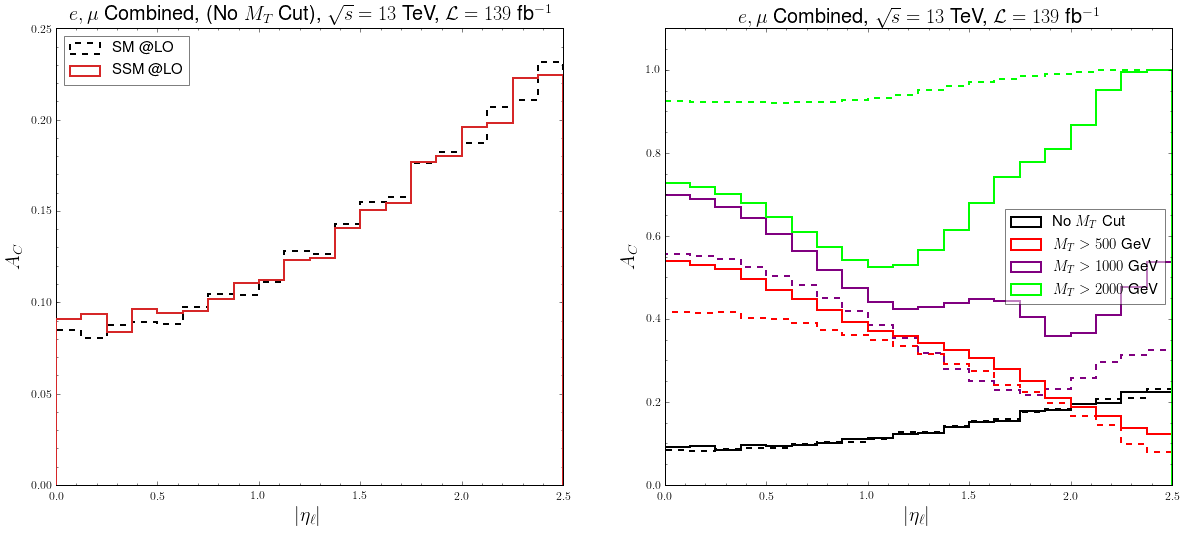

In [228]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

#bin_pos = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5]
#bin_neg =[-2.5, -2.375, -2.25, -2.125, -2.0, -1.875, -1.75,-1.625,-1.5,-1.375,-1.25,-1.125,-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125]
#bins = bin_neg + bin_pos

#pos_binlabel = SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel
#neg_binlabel = pos_binlabel*(-1)

#pos_binlabel_list =  pos_binlabel.tolist()
#neg_binlabel_list =  neg_binlabel.tolist()

#neg_binlabel_list.sort()

#tot_binlabel_list = neg_binlabel_list + pos_binlabel_list


binlabel = []
i=0
for i in range(len(bins)-1):
    binlabel.append((bins[i]+bins[i+1])/2.)

"""
ax1 = plt.subplot(2, 2, 1)
plt.title(r"$e, \mu$ Combined, (No $M_T$ Cut), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^+)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos, facecolor="darkred",
             color=None, edgecolor='darkred', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepNeg, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell=\ell^+$ and $\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos+NumofEvents_LepNeg, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)

plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^+)$ SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_NumofEvents_LepPos, facecolor="darkred",
             color=None, edgecolor='darkred', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=5)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^-)$ SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_NumofEvents_LepNeg, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=6)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell=\ell^+$ and $\ell^-)$ SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_NumofEvents_LepPos+SSM_NumofEvents_LepNeg, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=4)

plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(2, 2, 2)
plt.title(r"$e, \mu$ Combined, ($M_T >$ 2 TeV), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^+)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_MtMiss_2000, facecolor="darkred",
             color=None, edgecolor='darkred', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepNeg_MtMiss_2000, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell=\ell^+$ and $\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_MtMiss_2000+NumofEvents_LepNeg_MtMiss_2000, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)

plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^+)$ SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_NumofEvents_LepPos_MtMiss_2000, facecolor="darkred",
             color=None, edgecolor='darkred', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=5)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell^-)$ SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_NumofEvents_LepNeg_MtMiss_2000, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=6)
plt.hist(binlabel,bins=bins,
             label=r'$\eta(\ell=\ell^+$ and $\ell^-)$ SSM @LO', histtype="step", rwidth=1.0,
             weights=SSM_NumofEvents_LepPos_MtMiss_2000+SSM_NumofEvents_LepNeg_MtMiss_2000, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=4)
plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')
"""

ax3 = plt.subplot(2, 2, 3)
plt.title(r"$e, \mu$ Combined, (No $M_T$ Cut), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(binlabel,bins=bins,
             label=r'SSM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lep_SSM_LO, facecolor="red",
             color=None, edgecolor='tab:red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

ax4 = plt.subplot(2, 2, 4)
plt.title(r"$e, \mu$ Combined, $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(binlabel,bins=bins,
             histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) #label=r'SM @LO (No $M_T$ Cut)',
plt.hist(binlabel,bins=bins,
             histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_500, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) #label=r'SM @LO ($M_T > 500$ GeV)',
plt.hist(binlabel,bins=bins,
             histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_1000, facecolor="purple",
             color=None, edgecolor='purple', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) # label=r'SM @LO ($M_T > 1000$ GeV)',
plt.hist(binlabel,bins=bins,
             histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_2000, facecolor="lime",
             color=None, edgecolor='lime', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) # label=r'SM @LO ($M_T > 2000$ GeV)',

plt.hist(binlabel,bins=bins,
             label=r'No $M_T$ Cut', histtype="step", rwidth=1.0,
             weights=AC_Lep_SSM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) #label=r'SSM @LO (No $M_T$ Cut)'
plt.hist(binlabel,bins=bins,
             label=r'$M_T > 500$ GeV', histtype="step", rwidth=1.0,
             weights=AC_Lep_SSM_LO_MtMiss_500, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) #label=r'SSM @LO ($M_T > 500$ GeV)'
plt.hist(binlabel,bins=bins,
             label=r'$M_T > 1000$ GeV', histtype="step", rwidth=1.0,
             weights=AC_Lep_SSM_LO_MtMiss_1000, facecolor="purple",
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) #  label=r'SSM @LO ($M_T > 1000$ GeV)'
plt.hist(binlabel,bins=bins,
             label=r'$M_T > 2000$ GeV', histtype="step", rwidth=1.0,
             weights=AC_Lep_SSM_LO_MtMiss_2000, facecolor="lime",
             color=None, edgecolor='lime', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2) # label=r'SSM @LO ($M_T > 2000$ GeV)'


plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')

##leg = ax1.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
##leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
##leg.set_zorder(100)
#ax1.set_xlim([min(bins),max(bins)])
#ax1.set_ylim([0.,0.8])

##leg = ax2.legend(loc='lower left',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
##leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
##leg.set_zorder(100)
#ax2.set_xlim([min(bins),max(bins)])
#ax2.set_ylim([1e-5,1e8])

leg = ax3.legend(loc='upper left',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
#ax3.set_xlim([min(bins),max(bins)])
#ax3.set_ylim([0.,0.8])

leg = ax4.legend(loc='center right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
#ax4.set_xlim([min(bins),max(bins)])
ax4.set_ylim([0.,1.1])

plt.show()

In [12]:
############################ SM @ LO #####################################

import pandas as pd
ACC_SM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/CurrentData/SMlepneut_LO_new4.csv')
#print(ACC_SM_LO)

# Applt Eta < 2.5
FirstCut = ACC_SM_LO[:][(abs(ACC_SM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMiss_Cut = SecondCut[:][(SecondCut["MtMiss"]>2000) & (SecondCut["MET"]>1000) & (SecondCut["Lepton_PT"]>1000)]

bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin[0:10]).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax[0:10])]
#print(bins)

#bins_MT2000and5000 = [2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins_MT2000and5000 = [2200.0, 2400.0, 2600.0, 2800.0, 3000.0, 3200.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins = bins + bins_MT2000and5000
#print(bins)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []


i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos = len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos = sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)
       
    Box_LepNeg = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)       
    
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)


AC_num_Lep = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den_Lep = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_Lep_SM_LO        = AC_num_Lep/np.where(AC_den_Lep==0,1e10,AC_den_Lep)

SM_LO_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)
#Number of Events
NumofEvents_LepPos = TotEvWeight_LepPos_Arr2*lumi*SM_LO.xsec*1000/SM_LO_totsumw
NumofEvents_LepNeg = TotEvWeight_LepNeg_Arr2*lumi*SM_LO.xsec*1000/SM_LO_totsumw

MemoryError: 

In [428]:
############################ SM + Sequential SM @ LO #####################################

import pandas as pd
ACC_SeqSM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/CurrentData/SeqSMlepneut_LO_new2.csv')
#print(ACC_SeqSM_LO)

# Applt Eta < 2.5
FirstCut = ACC_SeqSM_LO[:][(abs(ACC_SeqSM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMiss_Cut = SecondCut[:][(SecondCut["MtMiss"]>2000) & (SecondCut["MET"]>1000) & (SecondCut["Lepton_PT"]>1000)]

bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin[0:10]).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax[0:10])]
#print(bins)

#bins_MT2000and5000 = [2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins_MT2000and5000 = [2200.0, 2400.0, 2600.0, 2800.0, 3000.0, 3200.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins = bins + bins_MT2000and5000
#print(bins)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)
    
    Box_LepNeg = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)       

        
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)

AC_num_Lep = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den_Lep = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_Lep_SeqSM_LO        = AC_num_Lep/np.where(AC_den_Lep==0,1e10,AC_den_Lep)

SSM_LO_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)

#Number of Events
NumofEvents_LepPos_SeqSM = TotEvWeight_LepPos_Arr2*lumi*SSM_LO.xsec*1000/SSM_LO_totsumw
NumofEvents_LepNeg_SeqSM = TotEvWeight_LepNeg_Arr2*lumi*SSM_LO.xsec*1000/SSM_LO_totsumw

In [469]:
############################ LRSM @ LO #####################################

import pandas as pd
ACC_LRSM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/CurrentData/LRSM_lepneut_LO.csv') 
#print(len(ACC_LRSM_LO))

# Applt Eta < 2.5
FirstCut = ACC_LRSM_LO[:][(abs(ACC_LRSM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMiss_Cut = SecondCut[:][(SecondCut["MtMiss"]>2000) & (SecondCut["MET"]>1000) & (SecondCut["Lepton_PT"]>1000)]

bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin[0:10]).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax[0:10])]
#print(bins)

#bins_MT2000and5000 = [2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins_MT2000and5000 = [2200.0, 2400.0, 2600.0, 2800.0, 3000.0, 3200.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins = bins + bins_MT2000and5000
#print(bins)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)
    
    Box_LepNeg = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)      

        
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)


AC_num_Lep = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den_Lep = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_Lep_LRSM_LO        = AC_num_Lep/np.where(AC_den_Lep==0,1e10,AC_den_Lep)

LRSM_LO_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)
#Number of Events
NumofEvents_LepPos_LRSM_LO = TotEvWeight_LepPos_Arr2*lumi*LRSM_LO.xsec*1000/LRSM_LO_totsumw
NumofEvents_LepNeg_LRSM_LO = TotEvWeight_LepNeg_Arr2*lumi*LRSM_LO.xsec*1000/LRSM_LO_totsumw

In [483]:
############################ LRSM @ LO (NR > nu_L Z >  nu_L  nu_L  nu_L) #####################################

import pandas as pd
ACC_LRSM_NRdecay = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/CurrentData/ACC.csv') #LRSM_lepneut_NRdecay_Set1.csv
#print(len(ACC_LRSM_LO))

# Applt Eta < 2.5
FirstCut = ACC_LRSM_NRdecay[:][(abs(ACC_LRSM_NRdecay["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMiss_Cut = SecondCut[:][(SecondCut["MtMiss"]>2000) & (SecondCut["MET"]>1000) & (SecondCut["Lepton_PT"]>1000)]

bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin[0:10]).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax[0:10])]
#print(bins)

#bins_MT2000and5000 = [2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins_MT2000and5000 = [2200.0, 2400.0, 2600.0, 2800.0, 3000.0, 3200.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins = bins + bins_MT2000and5000
#print(bins)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)
    
    Box_LepNeg = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)      

        
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)


AC_num_Lep = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den_Lep = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_Lep_LRSM_NRdecay        = AC_num_Lep/np.where(AC_den_Lep==0,1e10,AC_den_Lep)

ACC_LRSM_NRdecay_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)
#Number of Events
NumofEvents_LepPos_LRSM_NRdecay_LO = TotEvWeight_LepPos_Arr2*lumi*LRSM_NRdecay_LO.xsec*1000/ACC_LRSM_NRdecay_totsumw
NumofEvents_LepNeg_LRSM_NRdecay_LO = TotEvWeight_LepNeg_Arr2*lumi*LRSM_NRdecay_LO.xsec*1000/ACC_LRSM_NRdecay_totsumw

In [484]:
############################ AddSU2L @ LO #####################################

import pandas as pd
ACC_AddSU2L_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/CurrentData/AddSU2L_lepneut_LO.csv')
#print(len(ACC_AddSU2L_LO))

# Applt Eta < 2.5
FirstCut = ACC_AddSU2L_LO[:][(abs(ACC_AddSU2L_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMiss_Cut = SecondCut[:][(SecondCut["MtMiss"]>2000) & (SecondCut["MET"]>1000) & (SecondCut["Lepton_PT"]>1000)]

bins = np.array(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMin[0:10]).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='MtMiss One Lepton'].binMax[0:10])]
#print(bins)

#bins_MT2000and5000 = [2500.0, 3000.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins_MT2000and5000 = [2200.0, 2400.0, 2600.0, 2800.0, 3000.0, 3200.0, 3500.0, 4000.0, 4500.0, 5000.0]
bins = bins + bins_MT2000and5000
#print(bins)

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
TotEvWeight_LepPos_List1 = []
TotEvWeight_LepNeg_List1 = []

TotEvWeight_LepPos_List2 = []
TotEvWeight_LepNeg_List2 = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= len(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List1.append(TotEvWeight_LepPos)
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    TotEvWeight_LepPos_List2.append(TotEvWeight_LepPos)    
   
    Box_LepNeg = SecondCut[:][(SecondCut["MtMiss"]>bins[i]) & (SecondCut["MtMiss"]<bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = len(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List1.append(TotEvWeight_LepNeg)
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    TotEvWeight_LepNeg_List2.append(TotEvWeight_LepNeg)      
        
TotEvWeight_LepPos_Arr1 = np.array(TotEvWeight_LepPos_List1)
TotEvWeight_LepNeg_Arr1 = np.array(TotEvWeight_LepNeg_List1)

TotEvWeight_LepPos_Arr2 = np.array(TotEvWeight_LepPos_List2)
TotEvWeight_LepNeg_Arr2 = np.array(TotEvWeight_LepNeg_List2)

AC_num_Lep = TotEvWeight_LepPos_Arr1 - TotEvWeight_LepNeg_Arr1
AC_den_Lep = TotEvWeight_LepPos_Arr1 + TotEvWeight_LepNeg_Arr1

AC_Lep_AddSU2L_LO        = AC_num_Lep/np.where(AC_den_Lep==0,1e10,AC_den_Lep)

AddSU2L_LO_totsumw = sum(TotEvWeight_LepPos_Arr2)+sum(TotEvWeight_LepNeg_Arr2)
#Number of Events
NumofEvents_LepPos_AddSU2L_LO = TotEvWeight_LepPos_Arr2*lumi*AddSU2L_LO.xsec*1000/AddSU2L_LO_totsumw
NumofEvents_LepNeg_AddSU2L_LO = TotEvWeight_LepNeg_Arr2*lumi*AddSU2L_LO.xsec*1000/AddSU2L_LO_totsumw

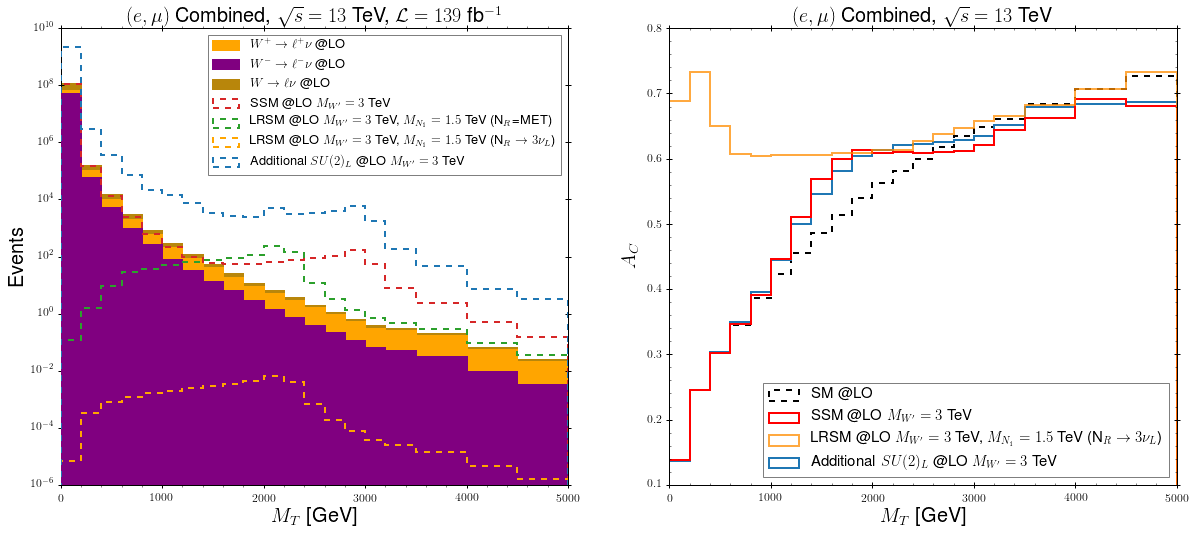

In [489]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)


binlabel = []
i=0
for i in range(len(bins)-1):
    binlabel.append((bins[i]+bins[i+1])/2.)
        
    
ax1 = plt.subplot(2, 2, 1)
plt.title(r"$(e, \mu)$ Combined, $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(binlabel,bins=bins,
             label=r'$W^+ \to \ell^+ \nu$ @LO', histtype="stepfilled", rwidth=1.0,
             weights=NumofEvents_LepPos, facecolor="orange",
             color=None, edgecolor='orange', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(binlabel,bins=bins,
             label=r'$W^- \to \ell^- \nu$ @LO', histtype="stepfilled", rwidth=1.0,
             weights=NumofEvents_LepNeg, facecolor="purple",
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.hist(binlabel,bins=bins,
             label=r'$W \to \ell \nu$ @LO', histtype="stepfilled", rwidth=1.0,
             weights=NumofEvents_LepPos+NumofEvents_LepNeg, facecolor="darkgoldenrod",
             color=None, edgecolor='darkgoldenrod', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)


#plt.hist(binlabel,bins=bins,
#             label=r'$W^{\prime +} \to \ell^+ \nu$ @LO', histtype="step", rwidth=1.0,
#             weights=NumofEvents_LepPos_SeqSM, facecolor="darkred",
#             color=None, edgecolor='darkred', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
#plt.hist(binlabel,bins=bins,
#             label=r'$W^{\prime -} \to \ell^- \nu$ @LO', histtype="step", rwidth=1.0,
#             weights=NumofEvents_LepNeg_SeqSM, facecolor="red",
#             color=None, edgecolor='red', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.hist(binlabel,bins=bins,
             label=r'SSM @LO $M_{W^\prime}=3$ TeV', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_SeqSM+NumofEvents_LepNeg_SeqSM, facecolor="tab:green",
             color=None, edgecolor="tab:red", linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=4)
#plt.scatter(binlabel,NumofEvents_LepPos_SeqSM+NumofEvents_LepNeg_SeqSM, marker="o", s=60, color="black",zorder=5) #label=r'SSM @LO $M_{W^\prime}=3$ TeV'


plt.hist(binlabel,bins=bins,
             label=r'LRSM @LO $M_{W^\prime}=3$ TeV, $M_{N_1}=1.5$ TeV (N$_R$=MET)', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_LRSM_LO+NumofEvents_LepNeg_LRSM_LO, facecolor="tab:green",
             color=None, edgecolor="tab:green", linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=5)
#plt.scatter(binlabel,NumofEvents_LepPos_SeqSM+NumofEvents_LepNeg_SeqSM, marker="o", s=60, color="black",zorder=5) #label=r'SSM @LO $M_{W^\prime}=3$ TeV'


plt.hist(binlabel,bins=bins,
             label=r'LRSM @LO $M_{W^\prime}=3$ TeV, $M_{N_1}=1.5$ TeV (N$_R \to 3\nu_L$)', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_LRSM_NRdecay_LO+NumofEvents_LepNeg_LRSM_NRdecay_LO, facecolor="orange",
             color=None, edgecolor="orange", linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=6)
#plt.scatter(binlabel,NumofEvents_LepPos_SeqSM+NumofEvents_LepNeg_SeqSM, marker="o", s=60, color="black",zorder=6) #label=r'SSM @LO $M_{W^\prime}=3$ TeV'



plt.hist(binlabel,bins=bins,
             label=r'Additional $SU(2)_L$ @LO $M_{W^\prime}=3$ TeV', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_AddSU2L_LO+NumofEvents_LepNeg_AddSU2L_LO, facecolor="tab:blue",
             color=None, edgecolor="tab:blue", linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=7)
#plt.scatter(binlabel,NumofEvents_LepPos_SeqSM+NumofEvents_LepNeg_SeqSM, marker="o", s=60, color="black",zorder=7) #label=r'SSM @LO $M_{W^\prime}=3$ TeV'

plt.xlabel(r' $M_T$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
#plt.xscale('log')
plt.yscale('log')


ax2 = plt.subplot(2, 2, 2)
plt.title(r"$(e, \mu)$ Combined, $\sqrt{s}= 13$ TeV", fontsize=20)
plt.hist(binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="dashed",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=-5)
plt.hist(binlabel,bins=bins,
             label=r'SSM @LO $M_{W^\prime}=3$ TeV', histtype="step", rwidth=1.0,
             weights=AC_Lep_SeqSM_LO, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=-3)
#plt.hist(binlabel,bins=bins,
#             label=r'LRSM @LO $M_{W^\prime}=3$ TeV, $M_{N_1}=1.5$ TeV (N$_R$=MET)', histtype="step", rwidth=1.0,
#             weights=AC_Lep_LRSM_LO, facecolor="tab:green",
#             color=None, edgecolor='tab:green', linewidth=2, linestyle="solid",
#             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=-2)
plt.hist(binlabel,bins=bins,
             label=r'LRSM @LO $M_{W^\prime}=3$ TeV, $M_{N_1}=1.5$ TeV (N$_R \to 3\nu_L$)', histtype="step", rwidth=1.0,
             weights=AC_Lep_LRSM_NRdecay, facecolor="darkorange",
             color=None, edgecolor='darkorange', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=-1, alpha=0.75)
plt.hist(binlabel,bins=bins,
             label=r'Additional $SU(2)_L$ @LO $M_{W^\prime}=3$ TeV', histtype="step", rwidth=1.0,
             weights=AC_Lep_AddSU2L_LO, facecolor="tab:blue",
             color=None, edgecolor='tab:blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=-4)
plt.xlabel(r'$M_T$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.xscale('log')
#plt.yscale('log')

""""
ax3 = plt.subplot(2, 2, 3)
plt.title(r"$e, \mu$ Combined, ($M_T >$ 2 TeV), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
             label=r'$W^+ \to \ell^+ \nu$ @LO', histtype="stepfilled", rwidth=1.0,
             weights=NumofEvents_LepPos_MtMiss, facecolor="darkred",
             color=None, edgecolor='darkred', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
             label=r'$W^- \to \ell^- \nu$ @LO', histtype="stepfilled", rwidth=1.0,
             weights=NumofEvents_LepNeg_MtMiss, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
             label=r'$W \to \ell \nu$ @LO', histtype="stepfilled", rwidth=1.0,
             weights=NumofEvents_LepPos_MtMiss+NumofEvents_LepNeg_MtMiss, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel(r'$M_T$ [GeV]' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
#plt.yscale('log')


ax4 = plt.subplot(2, 2, 4)
plt.title(r"$e, \mu$ Combined, ($M_T >$ 2 TeV), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='MtMiss One Muon'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.xlabel(r'$M_T$ [GeV]' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')
"""

leg = ax1.legend(loc='upper right',fontsize=13) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax1.set_xlim([min(bins),5000])
#ax1.set_ylim([0.,0.8])
ax1.tick_params(axis="x", direction="inout", length=6, width=1, color="black",zorder=100)
ax1.tick_params(axis="y", direction="inout", length=6, width=1, color="black",zorder=100)
ax1.tick_params(which="minor", axis="x", direction="out")
ax1.tick_params(which="minor", axis="y", direction="out")


leg = ax2.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
ax2.set_xlim([0,5000])
ax2.set_ylim([0.1,0.8])
ax2.tick_params(axis="x", direction="inout", length=6, width=1, color="black",zorder=100)
ax2.tick_params(axis="y", direction="inout", length=6, width=1, color="black",zorder=100)
ax2.set_zorder(100)

#leg = ax3.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
#leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
#leg.set_zorder(100)
#ax3.set_xlim([min(bins),4000])
#ax3.set_ylim([-1.0,1.1])

#leg = ax4.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
#leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
#leg.set_zorder(100)
#ax4.set_xlim([min(bins),max(bins)])
#ax4.set_ylim([0.,0.8])

plt.show()

In [89]:
########################### Ac vs Eta Plot ##############################

############################ SM @ LO #####################################

import pandas as pd
#ACC_SM_LO = pd.read_csv ('/home/phylab/hepwork/madanalysis5/ChargeAsymmetry/Build/ACC_SM_LO_13TeV.csv')
#print(ACC_SM_LO)

# Applt Eta < 2.5
FirstCut = ACC_SM_LO[:][(abs(ACC_SM_LO["Eta"])<=2.5)]

# Apply PT > 25 GeV
SecondCut = FirstCut[:][(FirstCut["Lepton_PT"]>=25)]

MtMissCut_75   = SecondCut[:][(SecondCut["MtMiss"]>=75)]
MtMissCut_100  = SecondCut[:][(SecondCut["MtMiss"]>=100)]
MtMissCut_500  = SecondCut[:][(SecondCut["MtMiss"]>=500)]
MtMissCut_1000 = SecondCut[:][(SecondCut["MtMiss"]>=1000)]
MtMissCut_2000 = SecondCut[:][(SecondCut["MtMiss"]>=2000)]

#bin_pos = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5]
#bin_neg =[-2.5, -2.375, -2.25, -2.125, -2.0, -1.875, -1.75,-1.625,-1.5,-1.375,-1.25,-1.125,-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125]
#bins = bin_neg + bin_pos
#print(bins)

bins = np.array(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binMin).tolist()+[max(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_minus)'].binMax)]

###################### Combined ##############################
# Apply MtMiss > 2400 GeV and MtMiss < 3600 GeV
NumofEvents_LepPos = []
NumofEvents_LepNeg = []

NumofEvents_LepPos_MtMiss = []
NumofEvents_LepNeg_MtMiss = []

NumofEvents_LepPos_MtMiss_75 = []
NumofEvents_LepNeg_MtMiss_75 = []

NumofEvents_LepPos_MtMiss_100 = []
NumofEvents_LepNeg_MtMiss_100 = []

NumofEvents_LepPos_MtMiss_500 = []
NumofEvents_LepNeg_MtMiss_500 = []

NumofEvents_LepPos_MtMiss_1000 = []
NumofEvents_LepNeg_MtMiss_1000 = []

NumofEvents_LepPos_MtMiss_2000 = []
NumofEvents_LepNeg_MtMiss_2000 = []

i=0
for i in range(len(bins)-1):
    Box_LepPos = SecondCut[:][(abs(SecondCut["BoostedLep_Eta"])>=bins[i]) & (abs(SecondCut["BoostedLep_Eta"])<=bins[i+1]) & (SecondCut["Lepton_ID"] < 0)]
    TotEvWeight_LepPos= sum(Box_LepPos["EvWeight"])
    NumofEvents_LepPos.append(lumi*TotEvWeight_LepPos*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg = SecondCut[:][(abs(SecondCut["BoostedLep_Eta"])>=bins[i]) & (abs(SecondCut["BoostedLep_Eta"])<=bins[i+1]) & (SecondCut["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg = sum(Box_LepNeg["EvWeight"])
    NumofEvents_LepNeg.append(lumi*TotEvWeight_LepNeg*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)    

#    Box_LepPos_MtMiss  = MtMissCut[:][(abs(MtMissCut["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut["Lepton_ID"] < 0)]
#    TotEvWeight_LepPos_MtMiss = sum(Box_LepPos_MtMiss["EvWeight"])
#    NumofEvents_LepPos_MtMiss.append(lumi*TotEvWeight_LepPos_MtMiss*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

#    Box_LepNeg_MtMiss = MtMissCut[:][(abs(MtMissCut["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut["Lepton_ID"] > 0)]
#    TotEvWeight_LepNeg_MtMiss = sum(Box_LepNeg_MtMiss["EvWeight"])
#    NumofEvents_LepNeg_MtMiss.append(lumi*TotEvWeight_LepNeg_MtMiss*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)  
    
    #MT > 75 GeV
    Box_LepPos_MtMiss_75  = MtMissCut_75[:][(abs(MtMissCut_75["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_75["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_75["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_75 = sum(Box_LepPos_MtMiss_75["EvWeight"])
    NumofEvents_LepPos_MtMiss_75.append(lumi*TotEvWeight_LepPos_MtMiss_75*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg_MtMiss_75 = MtMissCut_75[:][(abs(MtMissCut_75["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_75["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_75["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_75 = sum(Box_LepNeg_MtMiss_75["EvWeight"])
    NumofEvents_LepNeg_MtMiss_75.append(lumi*TotEvWeight_LepNeg_MtMiss_75*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)  

    #MT > 100 GeV     
    Box_LepPos_MtMiss_100  = MtMissCut_100[:][(abs(MtMissCut_100["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_100["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_100["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_100 = sum(Box_LepPos_MtMiss_100["EvWeight"])
    NumofEvents_LepPos_MtMiss_100.append(lumi*TotEvWeight_LepPos_MtMiss_100*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg_MtMiss_100 = MtMissCut_100[:][(abs(MtMissCut_100["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_100["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_100["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_100 = sum(Box_LepNeg_MtMiss_100["EvWeight"])
    NumofEvents_LepNeg_MtMiss_100.append(lumi*TotEvWeight_LepNeg_MtMiss_100*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)  
    
    #MT > 500 GeV
    Box_LepPos_MtMiss_500  = MtMissCut_500[:][(abs(MtMissCut_500["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_500["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_500["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_500 = sum(Box_LepPos_MtMiss_500["EvWeight"])
    NumofEvents_LepPos_MtMiss_500.append(lumi*TotEvWeight_LepPos_MtMiss_500*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg_MtMiss_500 = MtMissCut_500[:][(abs(MtMissCut_500["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_500["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_500["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_500 = sum(Box_LepNeg_MtMiss_500["EvWeight"])
    NumofEvents_LepNeg_MtMiss_500.append(lumi*TotEvWeight_LepNeg_MtMiss_500*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)      
    
    #MT > 1000 GeV
    Box_LepPos_MtMiss_1000  = MtMissCut_1000[:][(abs(MtMissCut_1000["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_1000["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_1000["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_1000 = sum(Box_LepPos_MtMiss_1000["EvWeight"])
    NumofEvents_LepPos_MtMiss_1000.append(lumi*TotEvWeight_LepPos_MtMiss_1000*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg_MtMiss_1000 = MtMissCut_1000[:][(abs(MtMissCut_1000["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_1000["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_1000["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_1000 = sum(Box_LepNeg_MtMiss_1000["EvWeight"])
    NumofEvents_LepNeg_MtMiss_1000.append(lumi*TotEvWeight_LepNeg_MtMiss_1000*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)      
    
    #MT > 2000 GeV
    Box_LepPos_MtMiss_2000  = MtMissCut_2000[:][(abs(MtMissCut_2000["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_2000["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_2000["Lepton_ID"] < 0)]
    TotEvWeight_LepPos_MtMiss_2000 = sum(Box_LepPos_MtMiss_2000["EvWeight"])
    NumofEvents_LepPos_MtMiss_2000.append(lumi*TotEvWeight_LepPos_MtMiss_2000*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)   

    Box_LepNeg_MtMiss_2000 = MtMissCut_2000[:][(abs(MtMissCut_2000["BoostedLep_Eta"])>=bins[i]) & (abs(MtMissCut_2000["BoostedLep_Eta"])<=bins[i+1]) & (MtMissCut_2000["Lepton_ID"] > 0)]
    TotEvWeight_LepNeg_MtMiss_2000 = sum(Box_LepNeg_MtMiss_2000["EvWeight"])
    NumofEvents_LepNeg_MtMiss_2000.append(lumi*TotEvWeight_LepNeg_MtMiss_2000*SM_LO.xsec*1000/SM_LO_LeptonPT25_sumw)      
    
NumofEvents_LepPos = np.array(NumofEvents_LepPos)
NumofEvents_LepNeg = np.array(NumofEvents_LepNeg)

#NumofEvents_LepPos_MtMiss = np.array(NumofEvents_LepPos_MtMiss)
#NumofEvents_LepNeg_MtMiss = np.array(NumofEvents_LepNeg_MtMiss)

NumofEvents_LepPos_MtMiss_75 = np.array(NumofEvents_LepPos_MtMiss_75)
NumofEvents_LepNeg_MtMiss_75 = np.array(NumofEvents_LepNeg_MtMiss_75)

NumofEvents_LepPos_MtMiss_100 = np.array(NumofEvents_LepPos_MtMiss_100)
NumofEvents_LepNeg_MtMiss_100 = np.array(NumofEvents_LepNeg_MtMiss_100)

NumofEvents_LepPos_MtMiss_500 = np.array(NumofEvents_LepPos_MtMiss_500)
NumofEvents_LepNeg_MtMiss_500 = np.array(NumofEvents_LepNeg_MtMiss_500)

NumofEvents_LepPos_MtMiss_1000 = np.array(NumofEvents_LepPos_MtMiss_1000)
NumofEvents_LepNeg_MtMiss_1000 = np.array(NumofEvents_LepNeg_MtMiss_1000)

NumofEvents_LepPos_MtMiss_2000 = np.array(NumofEvents_LepPos_MtMiss_2000)
NumofEvents_LepNeg_MtMiss_2000 = np.array(NumofEvents_LepNeg_MtMiss_2000)

AC_num_Lep = NumofEvents_LepPos - NumofEvents_LepNeg
AC_den_Lep = NumofEvents_LepPos + NumofEvents_LepNeg

#AC_num_Lep_MtMiss = NumofEvents_LepPos_MtMiss - NumofEvents_LepNeg_MtMiss
#AC_den_Lep_MtMiss = NumofEvents_LepPos_MtMiss + NumofEvents_LepNeg_MtMiss

AC_num_Lep_MtMiss_75 = NumofEvents_LepPos_MtMiss_75 - NumofEvents_LepNeg_MtMiss_75
AC_den_Lep_MtMiss_75 = NumofEvents_LepPos_MtMiss_75 + NumofEvents_LepNeg_MtMiss_75

AC_num_Lep_MtMiss_100 = NumofEvents_LepPos_MtMiss_100 - NumofEvents_LepNeg_MtMiss_100
AC_den_Lep_MtMiss_100 = NumofEvents_LepPos_MtMiss_100 + NumofEvents_LepNeg_MtMiss_100

AC_num_Lep_MtMiss_500 = NumofEvents_LepPos_MtMiss_500 - NumofEvents_LepNeg_MtMiss_500
AC_den_Lep_MtMiss_500 = NumofEvents_LepPos_MtMiss_500 + NumofEvents_LepNeg_MtMiss_500

AC_num_Lep_MtMiss_1000 = NumofEvents_LepPos_MtMiss_1000 - NumofEvents_LepNeg_MtMiss_1000
AC_den_Lep_MtMiss_1000 = NumofEvents_LepPos_MtMiss_1000 + NumofEvents_LepNeg_MtMiss_1000

AC_num_Lep_MtMiss_2000 = NumofEvents_LepPos_MtMiss_2000 - NumofEvents_LepNeg_MtMiss_2000
AC_den_Lep_MtMiss_2000 = NumofEvents_LepPos_MtMiss_2000 + NumofEvents_LepNeg_MtMiss_2000

AC_Lep_SM_LO = AC_num_Lep/AC_den_Lep
#AC_Lep_SM_LO_MtMiss      = AC_num_Lep_MtMiss/AC_den_Lep_MtMiss 
AC_Lep_SM_LO_MtMiss_75   = AC_num_Lep_MtMiss_75/AC_den_Lep_MtMiss_75
AC_Lep_SM_LO_MtMiss_100  = AC_num_Lep_MtMiss_100/AC_den_Lep_MtMiss_100
AC_Lep_SM_LO_MtMiss_500  = AC_num_Lep_MtMiss_500/AC_den_Lep_MtMiss_500
AC_Lep_SM_LO_MtMiss_1000 = AC_num_Lep_MtMiss_1000/AC_den_Lep_MtMiss_1000
AC_Lep_SM_LO_MtMiss_2000 = AC_num_Lep_MtMiss_2000/AC_den_Lep_MtMiss_2000    
    
    
NumofEvents_LepPos = np.array(NumofEvents_LepPos)
NumofEvents_LepNeg = np.array(NumofEvents_LepNeg)

NumofEvents_LepPos_MtMiss = np.array(NumofEvents_LepPos_MtMiss)
NumofEvents_LepNeg_MtMiss = np.array(NumofEvents_LepNeg_MtMiss)

#print(NumofEvents_LepPos)
#print(NumofEvents_LepNeg)

AC_num_Lep = NumofEvents_LepPos - NumofEvents_LepNeg
AC_den_Lep = NumofEvents_LepPos + NumofEvents_LepNeg

AC_num_Lep_MtMiss = NumofEvents_LepPos_MtMiss - NumofEvents_LepNeg_MtMiss
AC_den_Lep_MtMiss = NumofEvents_LepPos_MtMiss + NumofEvents_LepNeg_MtMiss

AC_Lep_SM_LO = AC_num_Lep/AC_den_Lep 

AC_Lep_SM_LO_MtMiss = AC_num_Lep_MtMiss/AC_den_Lep_MtMiss 

/home/phylab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in divide
/home/phylab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:158: RuntimeWarning: invalid value encountered in divide
/home/phylab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:159: RuntimeWarning: invalid value encountered in divide
/home/phylab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:160: RuntimeWarning: invalid value encountered in divide
/home/phylab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:161: RuntimeWarning: invalid value encountered in divide
/home/phylab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:162: RuntimeWarning: invalid value encountered in divide
/home/phylab/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:180: RuntimeWarning: invalid value encountered in divide


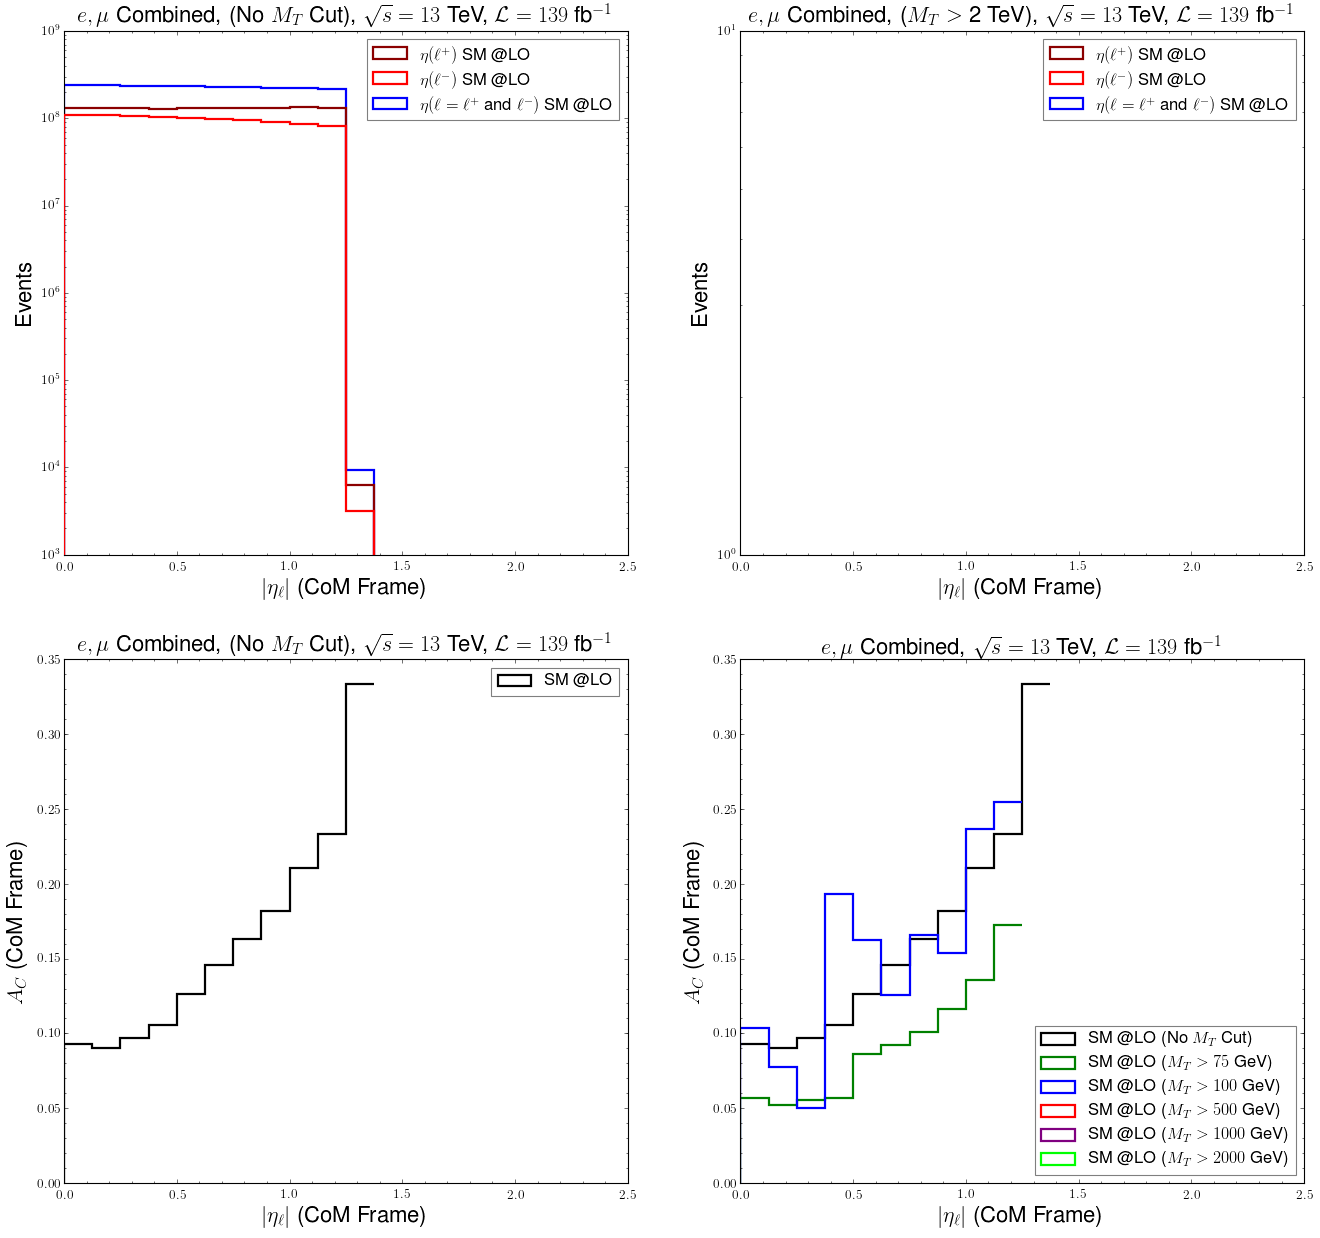

In [48]:
fig = plt.figure(1, figsize=(20, 18), facecolor='w', edgecolor='k')
#fig.suptitle(r'No $y_{\ell \ell}$ Cut', fontsize=40)

#bin_pos = [0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5]
#bin_neg =[-2.5, -2.375, -2.25, -2.125, -2.0, -1.875, -1.75,-1.625,-1.5,-1.375,-1.25,-1.125,-1.0,-0.875,-0.75,-0.625,-0.5,-0.375,-0.25,-0.125]
#bins = bin_neg + bin_pos

#pos_binlabel = SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel
#neg_binlabel = pos_binlabel*(-1)

#pos_binlabel_list =  pos_binlabel.tolist()
#neg_binlabel_list =  neg_binlabel.tolist()

#neg_binlabel_list.sort()

#tot_binlabel_list = neg_binlabel_list + pos_binlabel_list

ax1 = plt.subplot(2, 2, 1)
plt.title(r"$e, \mu$ Combined, (No $M_T$ Cut), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'$\eta(\ell^+)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos, facecolor="darkred",
             color=None, edgecolor='darkred', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'$\eta(\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepNeg, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'$\eta(\ell=\ell^+$ and $\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos+NumofEvents_LepNeg, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel('$|\eta_{\ell}|$ (CoM Frame)' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')

ax2 = plt.subplot(2, 2, 2)
plt.title(r"$e, \mu$ Combined, ($M_T >$ 2 TeV), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'$\eta(\ell^+)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_MtMiss_2000, facecolor="darkred",
             color=None, edgecolor='darkred', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'$\eta(\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepNeg_MtMiss_2000, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=3)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'$\eta(\ell=\ell^+$ and $\ell^-)$ SM @LO', histtype="step", rwidth=1.0,
             weights=NumofEvents_LepPos_MtMiss_2000+NumofEvents_LepNeg_MtMiss_2000, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=1)
plt.xlabel('$|\eta_{\ell}|$ (CoM Frame)' , fontsize=20)
plt.ylabel('Events' , fontsize=20)
plt.yscale('log')


ax3 = plt.subplot(2, 2, 3)
plt.title(r"$e, \mu$ Combined, (No $M_T$ Cut), $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.xlabel('$|\eta_{\ell}|$ (CoM Frame)' , fontsize=20)
plt.ylabel('$A_C$ (CoM Frame)' , fontsize=20)
#plt.yscale('log')


ax4 = plt.subplot(2, 2, 4)
plt.title(r"$e, \mu$ Combined, $\sqrt{s}= 13$ TeV, $\mathcal{L}=139$ fb$^{-1}$", fontsize=20)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO (No $M_T$ Cut)', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO, facecolor="black",
             color=None, edgecolor='black', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO ($M_T > 75$ GeV)', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_75, facecolor="green",
             color=None, edgecolor='green', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO ($M_T > 100$ GeV)', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_100, facecolor="blue",
             color=None, edgecolor='blue', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO ($M_T > 500$ GeV)', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_500, facecolor="red",
             color=None, edgecolor='red', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO ($M_T > 1000$ GeV)', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_1000, facecolor="purple",
             color=None, edgecolor='purple', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.hist(SM_LO_histos[SM_LO_histos.name=='pT > 30 GeV for AbsEta(Lepton_plus)'].binlabel,bins=bins,
             label=r'SM @LO ($M_T > 2000$ GeV)', histtype="step", rwidth=1.0,
             weights=AC_Lep_SM_LO_MtMiss_2000, facecolor="lime",
             color=None, edgecolor='lime', linewidth=2, linestyle="solid",
             bottom=None, cumulative=False, density=False, align="mid", orientation="vertical",zorder=2)
plt.xlabel('$|\eta_{\ell}|$' , fontsize=20)
plt.ylabel('$A_C$' , fontsize=20)
#plt.yscale('log')
plt.xlabel('$|\eta_{\ell}|$ (CoM Frame)' , fontsize=20)
plt.ylabel('$A_C$ (CoM Frame)' , fontsize=20)
#plt.yscale('log')

leg = ax1.legend(loc='upper right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
#ax1.set_xlim([min(bins),max(bins)])
#ax1.set_ylim([1e-4,1e9])

leg = ax2.legend(loc='upper right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
#ax2.set_xlim([min(bins),max(bins)])
#ax2.set_ylim([0.,0.8])

leg = ax3.legend(loc='upper right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
#ax3.set_xlim([min(bins),max(bins)])
#ax3.set_ylim([0.,0.8])

leg = ax4.legend(loc='lower right',fontsize=15) #,ncol=2)#,framealpha=.5)#.get_lines().set_linewidth(0.)
leg.get_frame().set_alpha(0.5)
#leg.get_frame().set_linewidth(0.0)
leg.set_zorder(100)
#ax4.set_xlim([min(bins),max(bins)])
#ax4.set_ylim([0.,0.8])

plt.show()